In [2]:
import os
import json
import time 
import numpy as npy
import tqdm
import re
import random
import uuid
from transformers import BertModel, BertTokenizer
import torch
import ast
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



# os.listdir('data')

img_dir     = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/all_test_train_22/images'
cjson_dir   = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/all_test_train_22/jsons'
json_dir    = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/combined'
save_dir    = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/structure_premises'
filter_list = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/test_filenames.txt'
tax_id_map  = npy.load('/home/csgrad/sahmed9/reps/RealCQA/code/evaluation/t_id_map.npy', allow_pickle=True)


In [96]:
# directory = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/pmctest22/'
# output_filenames = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/binary_test.txt'
# output_jsons_dir = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/binary/'

# # Create output directory if not exists
# # os.makedirs(output_jsons_dir, exist_ok=True)
directory = img_dir
# List all files in the directory
json_files = [file for file in os.listdir(directory) if file.endswith('.json')]

# List to store all answer lengths
all_answer_lengths = {}

# Iterate through each JSON file to find max answer length
for idx, file_name in enumerate(json_files):
    with open(os.path.join(directory, file_name), 'r') as json_file:
        data = json.load(json_file)
        # Iterate through each object in the JSON data
        for obj in data:
            # Calculate and store answer length
            __ = obj.get('answer_type')
            if __ ==  'Numerical' or __ =='String':
                _ = str(obj.get('answer'))
            else : 
                _ = obj.get('answer')
#             print(__, _)
            answer_length = len(_) 
            if __ in all_answer_lengths :
                all_answer_lengths[__].append(answer_length)
            else : 
                all_answer_lengths[__] = [answer_length]
            if __ == "Numerical" and answer_length >15 :
#             if __ == "Ranked List" and answer_length ==1 :
                print(file_name, obj.get('QID'), obj.get('question'), _)
#         if idx >10 : 
#             break
            


In [ ]:
for k in all_answer_lengths: 
    print(k, max(all_answer_lengths[k]))
    plt.hist(all_answer_lengths[k], bins=100)
    plt.title('Answer Lengths : '+ k)
    plt.xlabel('Answer Length')
    plt.ylabel('Frequency')
    plt.show()
    


# # Calculate maximum answer length
# max_length = max(all_answer_lengths)

# # Dictionary to store filenames categorized by answer length
# answer_length_buckets = {'low': [], 'medium': [], 'high': []}

# # Iterate through each JSON file again to categorize files based on answer length
# for file_name in json_files:
#     with open(os.path.join(directory, file_name), 'r') as json_file:
#         data = json.load(json_file)
#         # Iterate through each object in the JSON data
#         for obj in data:
#             # Check if the answer type is binary
#             if obj.get('answer_type') == 'Binary':
#                 # Calculate answer length
#                 answer_length = len(obj.get('answer'))
#                 # Categorize based on answer length range
#                 if answer_length <= max_length * 0.33:
#                     answer_length_buckets['low'].append((file_name, obj))
#                 elif max_length * 0.33 < answer_length <= max_length * 0.66:
#                     answer_length_buckets['medium'].append((file_name, obj))
#                 else:
#                     answer_length_buckets['high'].append((file_name, obj))


# # Randomly sample 1,000 files from each bucket
# sampled_files = []
# for bucket, files in answer_length_buckets.items():
#     sampled_files.extend(np.random.choice(files, size=1000, replace=False))

# # Save sampled filenames to output_filenames text file
# with open(output_filenames, 'w') as file:
#     for filename, _ in sampled_files:
#         file.write(filename + '\n')

# # Save corresponding JSON objects to individual files in output_jsons_dir
# for i, (filename, obj) in enumerate(sampled_files):
#     output_file_path = os.path.join(output_jsons_dir, f'binary_{i}.json')
#     with open(output_file_path, 'w') as output_file:
#         json.dump(obj, output_file)

# print('Sampling and saving completed.')



In [ ]:
from collections import Counter 
for k in all_answer_lengths: 
    print('\n', k, 'Max:', max(all_answer_lengths[k]), 'Total', len(all_answer_lengths[k]))
#     plt.hist(all_answer_lengths[k], bins=10)
#     plt.title('Answer Lengths : '+ k)
#     plt.xlabel('Answer Length')
#     plt.ylabel('Frequency')
#     plt.show()
    my_list = all_answer_lengths[k]
    frequency_dict = Counter(my_list)
    cumulative_frequency = {}
    cumulative_freq = 0
    for num in range(10,20,2):
        cumulative_freq += frequency_dict[num]
        cumulative_frequency[num] = cumulative_freq

#     for num, freq in cumulative_frequency.items():
#         print(f"Cumulative frequency of {num}: {freq}")

In [1]:
import os
import json

# Set directory paths
directory = json_dir
output_directory = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/cleaned_jsons/'
os.makedirs(output_directory, exist_ok=True)
json_files = [file for file in os.listdir(directory) if file.endswith('.json')]
question_count = {answer_type: 0 for answer_type in answer_types}

for file_name in tqdm.tqdm(json_files):
    with open(os.path.join(directory, file_name), 'r') as json_file:
        data = json.load(json_file)
        cleaned_data = []
        for obj in data:
            answer_type = obj.get('answer_type')
            if answer_type == 'Numerical':
                obj['answer'] = round(float(obj['answer']), 4)  
                cleaned_data.append(obj)
                question_count[answer_type] += 1
            elif answer_type in ['Ranked List', 'Unranked List']:
                if len(obj['answer']) >=4 and len(obj['answer']) <=10 : 
                    cleaned_data.append(obj)
                    question_count[answer_type] += 1
            else : 
                cleaned_data.append(obj)
                question_count[answer_type] += 1
            
        output_file_path = os.path.join(output_directory, file_name)
        with open(output_file_path, 'w') as output_file:
            json.dump(cleaned_data, output_file, indent=4)

# Print total files and total questions kept for each answer type
total_files = len(json_files)
print(f'Total files processed: {total_files}')
for answer_type, count in question_count.items():
    print(f'Total questions kept for {answer_type}: {count}')

print('Cleaning and saving completed.')


NameError: name 'json_dir' is not defined

***

In [ ]:
json_files = os.listdir(json_dir)
filter_test_id = None
unused_count = 0
questions = []
start_time = time.time()
for js in tqdm.tqdm(json_files) : 
    if filter_test_id is not None : 
        if js[:-5] not in filter_test_id:
            unused_count+=1
            continue
    jsn_list = json.load(open(os.path.join(json_dir, js), 'r'))
    questions.extend(jsn_list)  

    start_time = time.time() - start_time
print(f"Elapsed time to create qs: {start_time} seconds ={start_time/60} minutes")
print('Total unused/used images:', unused_count, '/', len(json_files)-unused_count)

def return_by_id(id_) :
    agg = []
    for q_block in questions:
        if q_block['QID'] == id_ :
            agg.append(q_block)
    return agg

***

In [97]:
SP1 = "The dependant axis is labeled as _y_title_."
SP2 = "The independant axis is labeled as _x_title_."
SP3 = "The dependant axis ranges from a minimum of _ymin_ to a maximum of _ymax_ in _y_title_."
SP4 = "The independant axis ranges from a minimum of _xmin_ to a maximum of _xmax_ in _x_title_."
SP5 = "The independant axis is categorical with the labels _x_ticks_."
SP6 = "Tick marks corresponding to specified _x_title_ values are present on the independant axis." 
SP7 = "Tick marks corresponding to specified _y_title_ values are present on the dependant axis." 
SP8 = "The chart contains a legend that differentiates between the _number_of_ds_ data series."
SP9 = "Each data series in the legend corresponds to a unique representation on the chart (e.g., color, pattern, line type) and has the labels _legend_labels_."

In [47]:
# 63 : Is the difference between the value of <Y title> at <ithx tick> and < jthx tick> greater than the difference between any two <plural form of X title>?
# 65:  Is the sum of the value of < Y title > for < ith x tick > and < (i + 1)th x tick > greater than the maximum value of < Y title > across all < pluralf orm of X title > ?
# 72 Is it the case that in every < singular form of Xtitle >, the sum of the value of < Y title > for < legendlabel1 > and < legendlabel2 > is greater than the value of < Y title > for <legendlabel3 > ?
# 62 Is the value of < Y title > for < legendlabel > at < ith x tick > less than that at <jth x tick > ? 
#  59 Is the value of < Y title > at < ith x tick > less than that at < jth x tick > ?
# 68 Is the difference between the value of < Y title >for < legendlabel1 > at < ith x tick > and at < jth x tick > greater than the difference between the value of < Y title >for < legendlabel2 > at < ith x tick > and at < jth x tick > ? 
# 146 Does any < plural form of X − title > have equal inter-quartile range?
# 166 Is the value of median at < ith x tick > less than that at < jth x tick >?
# 167 Is the value of upper quartile at < ith x tick > less than that at < jth x tick >?
# 169 Is the maximum value at < ith x tick > less than that at < jth x tick >?


# Reasoning Premises (RP):
def DP_val(data):
    _y_title_ = data['y_title']
    _i_ = data['_curr_x_tick_']
    template = random.choice([
        f'Value in the chart plot area exists at ({_i_}) for the axis called {_y_title_}',
        f'The axis of {_y_title_} has values at points ({_i_})',
        f'For the axis of {_y_title_}, there are valid plot values corresponding to ({_i_})'
    ])
    return random.choice(template)


def DP_val_leg(data):
    _y_title_ = data['_y_title_']
    _i_ = data['_i_']
    _legend_ = data['_legend_']
    DP_val_leg = [
        f'Value in the chart plot area exists at ({_i_}) for the axis called {_y_title_} for the data series {_legend_}', 
        f'The axis of {_y_title_} for the data series {_legend_} has values at points ({_i_})', 
        f'For the axis of {_y_title_}, there are valid plot values corresponding to ({_i_}) of the data series {_legend_}'
    ]
    return random.choice(DP_val_leg)


def DP_max_val(data):
    _y_title_ = data['_y_title_']
    _xi_, _yi_ = data['_xi_,_yi_']
    Dp_Max = [
        f'The value for {_y_title_} is maximum at ({_xi_} , {_yi_})',
        f'The maximum value of {_y_title_}, exists at ({_xi_} , {_yi_})', 
        f'Maximum {_y_title_} is at ({_xi_} , {_yi_})'
    ]
    return random.choice(Dp_Max)

def DP_max_box(data):
    _y_title_ = data['_y_title_']
    _xi_ = data['_xi_']
    __val__ = data['__val__'] 
    DpMaxBox = [
        f'The maximum value for {_y_title_} at {_xi_} is {__val__}', 
        f'The highest possible value for {_y_title_} at {_xi_} is {__val__}', 
        f'At {_xi_} the maximum value for {_y_title_} is {__val__}'
    ]
    return random.choice(DpMaxBox)


def DP_Min_Box(data):
    _y_title_ = data['_y_title_']  
    _xi_ = data['_xi_']   
    __val__ = data['__val__']
    DPMinBox = [
        f'The Minimum value for {_y_title_} at {_xi_} is {__val__}',
        f'The lowest possible value for {_y_title_} at {_xi_} is {__val__}',
        f'At {_xi_} the Minimum value for {_y_title_} is {__val__}'
    ]
    return random.choice(DPMinBox)


def DP_Line_Count(data):
    __ln_cnt__ = data['__ln_cnt__']
    DPLineCount = [
        f'There exists {__ln_cnt__} lines in the given chart',
        f'In the chart, there are {__ln_cnt__} lines',
        f'{__ln_cnt__} lines are being displayed in the chart.'
    ]
    return random.choice(DPLineCount)

def DP_Leg_Count(data):
    __leg_cnt__ = data['__leg_cnt__']
    DpLegCount = [
        f'There exists {__leg_cnt__} legends in the given chart',
        f'In the chart, there are {__leg_cnt__} legends',
        f'{__leg_cnt__} legends are being displayed in the chart.'
    ]
    return random.choice(DpLegCount)

def DP_Mark_Count(data):
    __Ml_lb__ = data['__Ml_lb__']
    pMarkCount = [
        f'There exists {__Ml_lb__} mark labels in the given chart',
        f'In the chart, there are {__Ml_lb__} mark labels',
        f'{__Ml_lb__} mark labels are being displayed in the chart.'
    ]
    return random.choice(pMarkCount)


def DP_FQ_exist(data):
    _x_, _y_ = data['_xi_,_yi_']
    DpFQexist = [
        f'The whisker at {_x_}, {_y_} represents the lower quartile corresponding with the 25th percentile of the dataseries', 
        f'The lower quartile with the 25th percentile of the dataseries is denoted by the whisker at {_x_}, {_y_}.',
        f'A whisker at the level of {_x_}, {_y_} indicates the lower quartile that is associated with the 25th percentile in the dataseries'
    ]
    return random.choice(DpFQexist)

def DP_FQ_val(data):
    __ytitle__ = data['_y_title_']
    __x__ = data['_xi_']
    __val__ = data['_val_']
    DpFQval = f'In the given chart for the box plot of {__ytitle__} the value at the first whisker for the lower quartile at {__x__} is {__val__}'
    
    return DpFQval 

def DP_TQ_exist(data):
    _x_, _y_ = data['_xi_,_yi_']
    DpTQexist = [
        f'The whisker at {_x_}, {_y_} represents the upper quartile corresponding with the 75th percentile of the dataseries', 
        f'The upper quartile with the 75th percentile of the dataseries is denoted by the whisker at {_x_}, {_y_}.',
        f'A whisker at the level of {_x_}, {_y_} indicates the third quartile that is associated with the 75th percentile in the dataseries'
    ]
    return random.choice(DpTQexist)

def DP_TQ_val(data):
    __ytitle__ = data['_y_title_']
    __x__ = data['_xi_']
    __val__ = data['_val_']
    DpTQval = [
        f'In the given chart for the box plot of {__ytitle__} the value at the second whisker for the upper quartile at {__x__} is {__val__}'
    ]
    return DpTQval[0]  # Since there's only one template, no need to use random.choice

##############################
def RP_59(data):
    _y_title_ = data['_y_title_']
    _i_ = data['_i_']
    _j_ = data['_j_']
    RP59 = [
       f'The value of {_y_title_} at x-tick {_i_} is less than that at x-tick {_j_}', 
        f'The difference of values of {_y_title_} at x-tick {_i_} and x-tick {_j_} is greater than zero', 
        f'The difference of values of {_y_title_} at x-tick {_j_} and x-tick {_i_} is less than zero'
    ]
    return random.choice(RP59)

def RP_62(data):
    _y_title_ = data['_y_title_']
    _legend_ = data['_legend_']
    _i_ = data['_i_']
    _j_ = data['_j_']
    RP62 = [
       f'The value of {_y_title_} for {_legend_} at x-tick {_i_} is less than that at x-tick {_j_}', 
        f'The difference of values of {_y_title_} for {_legend_} at x-tick {_i_} and x-tick {_j_} is greater than zero', 
        f'The difference of values of {_y_title_} for {_legend_} at x-tick {_j_} and x-tick {_i_} is less than zero'
    ]
    return random.choice(RP62)

def RP_63(data):
    _x_title_ = data['_x_title_']
    _y_title_ = data['_y_title_']
    _i_ = data['_i_']
    _j_ = data['_j_']
    RP63 = [
        f"The difference in {_x_title_} between {_i_} and {_j_} is greater than the largest difference between any two consecutive {_y_title_} values.",
        f"The maximum difference in {_x_title_} for any two consecutive {_y_title_} values is between {_i_} and {_j_}."
    ]
    return random.choice(RP63)

def RP_65(data):
    _xi_, _yi_ = data['_xi_,_yi_']
    _xj_, _yj_ = data['_xj_,_yj_']
    _xk_, _yk_ = data['_xk_,_yk_']
    RP65 = [
        f'The sum of the values at ({_xi_} , {_yi_}) and ({_xj_} , {_yj_}) is greater than the value at ({_xk_} , {_yk_})', 
        f'If the plot values at ({_xi_} , {_yi_}) and ({_xj_} , {_yj_}) are added together, the sum is greater than the value at ({_xk_} , {_yk_}).'
    ]
    return random.choice(RP65)


def RP_68(data):
    _y_title_ = data['_y_title_']
    _legendlabel1_ = data['_legend_'][0]
    _legendlabel2_ = data['_legend_'][1]
    _i_ = data['_i_']
    _j_ = data['_j_']
    RP68 = [
        f'The difference between value of {_y_title_} for {_legendlabel1_} at {_i_} and {_j_} is less than that at {_legendlabel2_}',
        f'The difference between the difference of {_i_} and {_j_} values of {_y_title_} for {_legendlabel1_} and {_legendlabel2_} is greater than zero'
    ]
    return random.choice(RP68)

def RP_72(data):
    _xi_, _yi_ = data['_xi_,_yi_']
    _xj_, _yj_ = data['_xj_,_yj_']
    _xk_, _yk_ = data['_xk_,_yk_']
    _legend_ = data['_legend_']
    RP72 = [
        f'The sum of the values at ({_xi_} , {_yi_}) and ({_xj_} , {_yj_}) is greater than the value at ({_xk_} , {_yk_}) for data series {_legend_}', 
        f'If the plot values for data series {_legend_} at ({_xi_} , {_yi_}) and ({_xj_} , {_yj_}) are added together, the sum is greater than the value at ({_xk_} , {_yk_}).'
    ]
    return random.choice(RP72)

def RP_146(data):
    _i_ = data['_i_']
    _j_ = data['_j_']
    RP146 = [
        f'x-tick {_i_} and x-tick {_j_} have equal interquartile range',
        f'The interquartile range at x-tick {_i_} matches that at x-tick {_j_}',
        f'Equal interquartile ranges are observed at x-ticks {_i_} and {_j_}'
    ]
    return random.choice(RP146)

def RP_166(data):
    _y_title_ = data['_y_title_']
    _i_ = data['_i_']
    _j_ = data['_j_']
    RP166 = [
        f'The median value at x-tick {_i_} is less than that at x-tick {_j_}',
        f'The difference of the median values of {_y_title_} at x-tick {_i_} and x-tick {_j_} is greater than zero', 
        f'The difference of the median values of {_y_title_} at x-tick {_j_} and x-tick {_i_} is less than zero'
    ]
    return random.choice(RP166)

def RP_167(data):
    _y_title_ = data['_y_title_']
    _i_ = data['_i_']
    _j_ = data['_j_']
    RP167 = [
        f'The value of upper quartile at x-tick {_i_} is less than that at x-tick {_j_}', 
        f'The difference of the upper quartile values of {_y_title_} at x-tick {_i_} and x-tick {_j_} is greater than zero', 
        f'The difference of the upper quartile values of {_y_title_} at x-tick {_j_} and x-tick {_i_} is less than zero'
    ]
    return random.choice(RP167)


def RP_168(data):
    _y_title_ = data['_y_title_']
    _i_ = data['_i_']
    _j_ = data['_j_']
    RP168 = [
        f'The value of lower quartile at x-tick {_i_} is less than that at x-tick {_j_}', 
        f'The difference of the lower quartile values of {_y_title_} at x-tick {_i_} and x-tick {_j_} is greater than zero', 
        f'The difference of the lower quartile values of {_y_title_} at x-tick {_j_} and x-tick {_i_} is less than zero'
    ]
    return random.choice(RP168)

def RP_169(data):
    _y_title_ = data['_y_title_']
    _i_ = data['_i_']
    _j_ = data['_j_']
    RP169 = [
       f'The maximum value of {_y_title_} at x-tick {_i_} is less than that at x-tick {_j_}', 
        f'The difference of the maximum values of {_y_title_} at x-tick {_i_} and x-tick {_j_} is greater than zero', 
        f'The difference of the maximum values of {_y_title_} at x-tick {_j_} and x-tick {_i_} is less than zero'
    ]
    return random.choice(RP169)


def RP_170(data):
    _Y_title_ = data['_y_title_']
    _i_ = data['_i_']
    _j_ = data['_j_']
    RP170 = [
        f'The Minimum value of {_Y_title_} at {_i_} is less than that at {_j_}',
        f'The difference of the Minimum values of {_Y_title_} at {_i_} and {_j_} is greater than zero',
        f'The difference of the Minimum values of {_Y_title_} at {_j_} and {_i_} is less than zero'
    ]
    return random.choice(RP170)


def RP_18(data):
    if data['line_match'] :
        Rp18T = [
            'Number of lines equals number of legends',
            'The count of lines matches the count of legends',
            'Equal quantities of lines and legends are present'
        ]
        return random.choice(Rp18T)
    else : 
        Rp18F = [
            'Number of lines do not equal number of legends',
            'There is a mismatch in the count of lines and legends',
            'Lines and legends are present in unequal numbers'
        ]
        return random.choice(Rp18F)

    
def RP_18a(data):
    if data['mark_match'] :
        Rp18aT = [
            'Number of lines equals number of mark labels',
            'The line count is identical to the count of mark labels',
            'An equal number of lines and mark labels are displayed'
        ]
        return random.choice(Rp18aT)
    else : 
        Rp18aF = [
            'Number of lines do not equal number of mark labels',
            'There is a disparity between the count of lines and mark labels',
            'Lines and mark labels count do not match'
        ]
        return random.choice(Rp18aF)


def RP_35(data):
    Rp35 = [
        'The y-axis values monotonically increase over the x-axis values.',
        'The values along the y-axis and across the entire width of the plane are inherently each greater than the previous',
        'A consistent upward trend is observed in y-axis values as one moves along the x-axis'
    ]
    return random.choice(Rp35)

def RP_116(data):
    __L__ = data['__L__']
    Rp116 = [
        f'The y-axis values for the legend {__L__} monotonically increase over the x-axis values.',
        f'The values along the y-axis and across the entire width of the plane for the legend {__L__} are inherently each greater than the previous',
        f'For the legend {__L__}, a continuous increase in y-axis values is noted as x-axis values progress'
    ]
    return random.choice(Rp116)

def RP_117(data):
    __L__ = data['__L__']
    Rp117 = [
        f'The y-axis values for the legend {__L__} monotonically decrease over the x-axis values.',
        f'The values along the y-axis and across the entire width of the plane for the legend {__L__} are inherently each lesser than the previous',
        f'For the legend {__L__}, a consistent decrease in y-axis values is observed with each step along the x-axis'
    ]
    return random.choice(Rp117)

def RP_121(data):
    legendlabel = data['_legend_']
    return f'{legendlabel} has a correlation value greater than 0 but less than or equal to 0.5'


def RP_122(data):
    legendlabel = data['_legend_']
    return f'{legendlabel} has correlation value greater than 0.5 but less than or equal to 1'


def RP_123(data):
    legendlabel = data['_legend_']
    return f'{legendlabel} has correlation value greater than or equal to -0.5 but less than to 0'


def RP_124(data):
    legendlabel = data['_legend_']
    return f'{legendlabel} has correlation value greater than or equal to -1 but less than -0.50'


############################

def MP_Median(data):
    __S__ = data['__S__']
    __n__ = data['__n__']
    __M__ = data['__M__']
    MPMedian = [
        f'Given a set {__S__} with {__n__} elements, {__M__} is the middle value when the data is arranged in ascending order.', 
        f'When the data is arranged in ascending order with an array of {__S__} elements, {__M__} is the middle value.', 
        f'In a set {__S__} with {__n__} elements, the middle value is {__M__} when data is arranged in ascending order.'
    ]
    return random.choice(MPMedian)



def MP_PC_all(data):
    X = data['_xi_']
    Y = data['_yi_']
    
    # Defining templates with placeholders for X and Y
    PC_mean_X_calculated = f'The mean of {X} is calculated correctly.'
    PC_mean_Y_calculated = f'The mean of {Y} is calculated correctly.'
    PC_deviations_x = f'There exist deviations of {X}-values from the mean of {X}.'
    PC_deviations_y = f'There exist deviations of {Y}-values from the mean of {Y}.'
    PC_products_of_deviations = 'There exist products of deviations.'
    PC_sum_of_products = 'The sum of products of deviations is calculated correctly.'
    PC_squared_deviations_x = f'There exist squared deviations of {X}-values from the mean of {X}.'
    PC_squared_deviations_y = f'There exist squared deviations of {Y}-values from the mean of {Y}.'
    PC_sqrt_of_product = 'The square root of the product of the sums of squared deviations is calculated correctly.'
    PC_correlation_coefficient = 'The Pearson correlation coefficient is calculated correctly.'
    
    # Combining all the statements into a list
    PC_all_statements = [
        PC_mean_X_calculated, 
        PC_mean_Y_calculated, 
        PC_deviations_x, 
        PC_deviations_y, 
        PC_products_of_deviations, 
        PC_sum_of_products, 
        PC_squared_deviations_x, 
        PC_squared_deviations_y, 
        PC_sqrt_of_product, 
        PC_correlation_coefficient 
    ]
    
    return PC_all_statements

In [5]:
data = {
    '_y_title_': 'Example Y Title',
    '_x_title_': 'Example Y Title',
    '_xi_': 'X Value for i',
    '_xi_,_yi_': ('X Value for i','Y Value for i') ,
    '_xj_,_yj_': ('X Value for j','Y Value for j') ,
    '_yi_': 'Y Value for i',
    '_xj_': 'X Value for j',
    '_i_': 'i',
    '_j_': 'j',
    '_yj_': 'Y Value for j',
    '_xk_': 'X Value for k',
    '_yk_': 'Y Value for k',
    '_xk_,_yk_': ('X Value for k','Y Value for k') ,
    '__val__': 'Value of data series',
    '__ln_cnt__': 'Example Line Count',
    '__leg_cnt__': 'Example Legend Count',
    '__Ml_lb__': 'Example Mark Label Count',
    '__L__': 'Legend L',
    '_legend_': 'Example Legend Label',
    '_fqval_' : 'First Whisker Val',
    '_tqval_' : 'Third Whisker Val',
    '_max_val_' : 'maximum value of data',
    '_min_val_' : 'minimum value of data',
    '_max_val_leg_' : 'maximum value of data with legend',
    '_min_val_leg_' : 'minimum value of data with legend',
    '__S__' : 'Set of scatter pts',
    '__n__' : len('Set of scatter pts'),
    '__M__' : 'medain of set',
    'line_match' : False, 
    'mark_match' : False,
 
}



# Assuming all necessary data is available in the 'data' dictionary and functions are defined as previously described

# Example for q59
q59 = [DP_val(data), DP_val(data), RP_59(data)]
q62 = [DP_val_leg(data), DP_val_leg(data), RP_62(data)]
q63 = [DP_val(data), DP_val(data), RP_63(data)]
q65 = [DP_val(data), DP_val(data), DP_max_val(data), RP_65(data)]
q72 = [DP_val_leg(data), DP_val_leg(data), RP_72(data)]
q68 = [DP_val_leg(data), DP_val_leg(data), RP_68(data)]
q146 = [DP_FQ_exist(data), DP_TQ_exist(data), DP_FQ_val(data), DP_TQ_val(data), RP_146(data)]
q166 = [MP_Median(data), RP_166(data)]
q167 = [DP_TQ_exist(data), DP_TQ_val(data), RP_167(data)]
q168 = [DP_FQ_exist(data), DP_FQ_val(data), RP_168(data)]
q169 = [DP_max_box(data), DP_max_box(data), RP_169(data)]
q170 = [DP_Min_Box(data), DP_Min_Box(data), RP_170(data)]
q18 = [DP_Leg_Count(data), DP_Line_Count(data), RP_18(data)]
q18a = [DP_Mark_Count(data), DP_Line_Count(data), RP_18a(data)]
q35 = [DP_val(data), RP_35(data)]
q116 = [DP_val_leg(data), RP_116(data)]
q117 = [DP_val_leg(data), RP_117(data)]

q121 = [DP_val_leg(data)]
q121.extend(MP_PC_all(data))
q121.extend([RP_121(data)])

q122 = [DP_val_leg(data)]
q122.extend(MP_PC_all(data))
q122.extend([RP_122(data)])

q123 = [DP_val_leg(data)]
q123.extend(MP_PC_all(data))
q123.extend([RP_123(data)])

q124 = [DP_val_leg(data)]
q124.extend(MP_PC_all(data))
q124.extend([RP_124(data)])



q_ids = ["59", "62", "63", "65", "72", "68", "146", "166", "167", "168", "169", "170", "18", "18a", "35", "116", "117", "121", "122", "123", "124"]

# q59 = [DP_val('i'), DP_val('j'), RP59]

# q62 = [DP_val_leg('i'), DP_val_leg('j'), RP62]

# q63 = [DP_val('i'), DP_val('j'), RP63]

# q65 = [DP_val('i'), DP_val('j'), Dp_Max('k'), RP65('i', 'j', 'k')]

# q72 = [DP_val_leg('i'), DPDP_val_leg1_val('j'), RP72('i', 'j', 'k')]

# q68 = [DP_val_leg('i'), DP_val_leg('j'), RP68]

# q146 = [DpFQexist, DpTQexist, DpFQval, DpTQval, RP146]

# q166 = [MPMedian, RP166]

# q167 = [DpTQexist, DpTQval, RP167]

# q168 = [DpFQexist, DpFQval, RP168]

# q169 = [DP_max_box(i), DP_max_box(j), RP_169(i, j)]

# q170 =[DpMinBox(i), pMinBox(j), Rp170]

# q18 = [RpLegCount, RpLineCount, (Rp18T,Rp18F)]

# q18a = [DpMarkCount, DpLineCount, (Rp18aT,Rp18aF)]

# q35 = [Dpval, Rp35]

# q116 = [Dpval_leg, Rp116]

# q117 = [Dpval_leg, Rp117]

# q121 = [Dpval_leg, PC__all, Rp121]

# q122 = [Dpval_leg, PC__all, Rp122]

# q123 = [Dpval_leg, PC__all, Rp123]

# q124 = [Dpval_leg, PC__all, Rp124]



In [80]:
img_dir     = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/all_test_train_22/images'
cjson_dir   = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/all_test_train_22/jsons'
json_dir    = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/combined'
filter_list = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/test_filenames.txt'
tax_id_map = npy.load('/home/csgrad/sahmed9/reps/RealCQA/code/evaluation/t_id_map.npy', allow_pickle=True)

json_files = os.listdir(json_dir)
filter_test_id = [text.strip() for text in open(filter_list, 'r').readlines()]

print('\n In create questions')
print('Total Images', len(json_files))
unused_count = 0
questions = []
start_time = time.time()
for js in tqdm.tqdm(json_files) : 
    if filter_test_id is not None : 
        if js[:-5] not in filter_test_id: ## Train
#         if js[:-5] in filter_test_id:  ## Test
            unused_count+=1
            continue
    jsn_list = json.load(open(os.path.join(json_dir, js), 'r'))
    questions.extend(jsn_list)  

    start_time = time.time() - start_time
print(f"Elapsed time to create qs: {start_time} seconds ={start_time/60} minutes")
print('Total unused/used images:', unused_count, '/', len(json_files)-unused_count)



 In create questions
Total Images 28266


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28266/28266 [00:50<00:00, 560.51it/s]

Elapsed time to create qs: 18.65875267982483 seconds =0.31097921133041384 minutes
Total unused/used images: 18909 / 9357


In [74]:
print(len(questions), questions[0])

1651916 {'taxonomy id': '2e', 'QID': '3', 'question': 'Where does the legend appear in the chart?', 'answer': 'Upper Left', 'answer_type': 'String', 'qa_id': 'iVmUQBBiryrH', 'PMC_ID': 'PMC5503343___materials-10-00260-g009'}


In [14]:
quest = [_ for _ in questions if _['QID'] in q_ids]

print(len(questions), len(quest))
print(quest[1])

1651916 333080
{'taxonomy id': '4b', 'QID': '116', 'question': 'Is the 355nm monotonically increasing?', 'answer': 'no', 'answer_type': 'Binary', 'qa_id': 'DGXXpjpuyJgR', 'PMC_ID': 'PMC5503343___materials-10-00260-g009'}


In [81]:
quest = [_ for _ in questions if _['QID'] in q_ids]

print(len(questions), len(quest))
print(quest[1])

372762 79530
{'taxonomy id': '4b', 'QID': '59', 'question': "Is the value of 'Foliar spot growth (cm / 9 days)' at 55 less than that at 1058?", 'answer': 'yes', 'answer_type': 'Binary', 'qa_id': 'FpIogWpQxtfw', 'PMC_ID': 'PMC3031546___2'}


In [71]:
import re

def extract_info_from_question(json_obj):
    qid_to_pattern = {
    '63': r'Is the difference between the value of (?P<y_title>.+) at (?P<x_i>.+) and (?P<x_j>.+) greater than the difference between any two (?P<x_title>.+)\?',
    '65': r'Is the sum of the value of (?P<y_title>.+) in (?P<x_i>.+) and (?P<x_j>.+) greater than the maximum value of (?P<y_title_extra>.+) across all (?P<x_title>.+)\?',
    '59': r'Is the value of (?P<y_title>.+) at (?P<x_i>.+) less than that at (?P<x_j>.+)\?',
    '72': r'Is it the case that in every (?P<x_title>.+), the sum of the value of (?P<y_title>.+) for (?P<legend1>.+) and (?P<legend2>.+) is greater than the value of (?P<y_title_extra>.+) for (?P<legend3>.+)\?',
    '62': r'Is the value of (?P<y_title>.+) for (?P<legend>.+) at (?P<x_i>.+) less than that at (?P<x_j>.+)\?',
    '68': r'Is the difference between the value of (?P<y_title>.+) for (?P<legend1>.+) at (?P<x_i>.+) and at (?P<x_j>.+) greater than the difference between the value of (?P<y_title_extra>.+) for (?P<legend2>.+) at (?P<xi_extra>.+) and at (?P<xj_extra>.+)\?',
    '146': r'Does any (?P<x_title>.+) have equal interyers-quartile range\?',
    '166': r'Is the value of median of (?P<y_title>.+) at (?P<x_i>.+) less than that at (?P<x_j>.+)\?',
    '167': r'Is the value of upper quartile of (?P<y_title>.+) at (?P<x_i>.+) less than that at (?P<x_j>.+)\?',
    '169': r'Is the maximum value of (?P<y_title>.+) at (?P<x_i>.+) less than that at (?P<x_j>.+)\?',
    '168': r'Is the value of lower quartile of (?P<y_title>.+) at (?P<x_i>.+) less than that at (?P<x_j>.+)\?',
    '170': r'Is the minimum value of (?P<y_title>.+) at (?P<x_i>.+) less than that at (?P<x_j>.+)\?',
    '18': r'Is the number of lines equal to the number of legend labels\?',
    '18a': r'Is the number of lines equal to the number of mark labels\?',
    '35': r'Does the (?P<y_title>.+) monotonically increase over the (?P<x_title>.+)\?',
    '116': r'Is the (?P<legend>.+) monotonically increasing\?',
        '117': r'Is the (?P<legend>.+) monotonically decreasing\?',
    '121': r'Does (?P<legend>.+) have low positive correlation\?',
    '122': r'Does (?P<legend>.+) have high positive correlation\?',
    '123': r'Does (?P<legend>.+) have low negative correlation\?',
    '124': r'Does (?P<legend>.+) have high negative correlation\?'
    }
    question = json_obj.get('question')
    extracted_info = {}
    pattern = qid_to_pattern.get(qid)
    if pattern:
        match = re.match(pattern, question, re.IGNORECASE)
        if match:
            extracted_info.update(match.groupdict())
        else : 
            print('!!!!!!! no match')
            print(json_obj)
            print(pattern)
    qid_done.add(qid)
    return extracted_info
    

In [72]:
# qid_done = set()

vars_ = set()
for q in quest :
    
    qid = q.get('QID')
#     if qid not in qid_done :
        _ = extract_info_from_question(q)

        print('-'*80)
        print(q['QID'], q['question'],q['answer'], '\n')
        print(q['PMC_ID'])
        for __ in _ : 
            print(__, _[__])
        for u in _.keys() :
            vars_.add(u)

print(vars_)
data = {}
for _ in vars_ : 
    data[_] = None
print(data)

--------------------------------------------------------------------------------
18 Is the number of lines equal to the number of legend labels? yes 

PMC5503343___materials-10-00260-g009
--------------------------------------------------------------------------------
116 Is the 355nm monotonically increasing? no 

PMC5503343___materials-10-00260-g009
legend 355nm
--------------------------------------------------------------------------------
117 Is the 355nm monotonically decreasing? no 

PMC5503343___materials-10-00260-g009
legend 355nm
--------------------------------------------------------------------------------
62 Is the value of 'Mean value of multicriteria flood risk' for Existing-condition at <1 less than that at 1~2? no 

PMC3108115___ijerph-08-01368f9
y_title 'Mean value of multicriteria flood risk'
legend Existing-condition
x_i <1
x_j 1~2
--------------------------------------------------------------------------------
68 Is the difference between the value of 'Mean value 

In [75]:
len(quest)
quest[0]

{'taxonomy id': '2j',
 'QID': '18',
 'question': 'Is the number of lines equal to the number of legend labels?',
 'answer': 'yes',
 'answer_type': 'Binary',
 'qa_id': 'EAriYAUbBiFU',
 'PMC_ID': 'PMC5503343___materials-10-00260-g009'}

In [66]:
all_extract = [extract_info_from_question(q) for q in quest]

In [79]:
_y_title_ = 'tertile'
_i_ = 0
k = f'DP::_::Value in the chart plot area exists at ({_i_}) for the axis called {_y_title_}'
print(k)
print(k.split('::_::'))

DP::_::Value in the chart plot area exists at (0) for the axis called tertile
['DP', 'Value in the chart plot area exists at (0) for the axis called tertile']


In [98]:
def superscript_to_int(superscript_str):
    """Convert superscript string to integer."""
    superscript_map = {"⁰": "0", "¹": "1", "²": "2", "³": "3", "⁴": "4", 
                       "⁵": "5", "⁶": "6", "⁷": "7", "⁸": "8", "⁹": "9"}
    return int("".join(superscript_map.get(char, '') for char in superscript_str))

def convert_to_numeric_or_string(value):
    # Patterns to match
    patterns = [
        (r'^(\d+)$', lambda x: int(x)),  # Integer
        (r'^(\d+\.\d+)$', lambda x: float(x)),  # Float
        (r'^(\d+(\.\d+)?[eE][+-]?\d+)$', lambda x: float(x)),  # Scientific notation
        (r'^(\d+(\.\d+)?)[×x*]10\^([+-]?\d+)$', lambda x: float(x.replace('×', 'e').replace('x', 'e').replace('*', 'e').replace('^', ''))),  # Custom scientific notation with "x" or "*"
        (r'^(\d{1,3}(,\d{3})*(\.\d+)?)$', lambda x: float(x.replace(',', ''))),  # Float with commas
        # Superscript scientific notation (e.g., "2.5×10⁵")
        (r'^(\d+(\.\d+)?)[×x*]10([⁰¹²³⁴⁵⁶⁷⁸⁹]+)$', lambda x: float(x.split('×')[0] + 'e' + str(superscript_to_int(x.split('×')[1][2:])))),
    ]
    
    for pattern, converter in patterns:
        match = re.match(pattern, value)
        if match:
            try:
                return converter(match.group(0))
            except ValueError:
                pass  # If conversion fails, try the next pattern
    
    # Fallback: return the original value as string if no pattern matches
    return value

def analyze_array(values):
    all_numeric = all(isinstance(value, (int, float)) for value in values)
    if all_numeric:
        return (min(values), max(values))
    else:
        return 'categorical'
    
def extract_txt_getRect(tb, filtered_ids ):
    results = []
    for block in tb:
        if block["id"] in filtered_ids:
            text = block["text"]
            polygon = block["polygon"]
            x = polygon["x0"]
            y = polygon["y0"]
            w = polygon["x1"] - polygon["x0"]  # Assuming x1 and x0 are the horizontal bounds
            h = polygon["y2"] - polygon["y0"]  # Assuming y2 and y0 are the vertical bounds
            results.append({
                "id": block["id"],
                "text": text,
                "bounding_box": {"x": x, "y": y, "width": w, "height": h}
            })
    return results

def get_combined_centroid(tb, filtered_ids):
    sum_x = 0
    sum_y = 0

    for block in tb:
        if block["id"] in filtered_ids:
            polygon = block["polygon"]
            centroid_x = (polygon["x0"] + polygon["x1"] + polygon["x2"] + polygon["x3"]) / 4
            centroid_y = (polygon["y0"] + polygon["y1"] + polygon["y2"] + polygon["y3"]) / 4
            sum_x += centroid_x
            sum_y += centroid_y
    
    filtered_count = len(filtered_ids)
    return (sum_x / filtered_count, sum_y / filtered_count)

def distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

def assign_axis_title(xax_ctr, yax_ctr, axs_titles, plot_bb):
    assignments = {'x_title': None, 'y_title': None}
    # Case when axis centroids are not provided
    if not xax_ctr or not yax_ctr:
        # Determine top-left-most title to assign as y_title
        titles_sorted_by_position = sorted(axs_titles, key=lambda t: (t["bounding_box"]["y"], t["bounding_box"]["x"]))
        if len(titles_sorted_by_position) > 1:
            assignments['y_title'] = titles_sorted_by_position[0]["text"]
            assignments['x_title'] = titles_sorted_by_position[1]["text"]
        elif titles_sorted_by_position:
            # When there's only one title, use plot_bb to decide
            title = titles_sorted_by_position[0]
            title_centroid = ((title["bounding_box"]["x"] + title["bounding_box"]["width"] / 2),
                              (title["bounding_box"]["y"] + title["bounding_box"]["height"] / 2))
            plot_centroid = (plot_bb["x0"] + plot_bb["width"] / 2, plot_bb["y0"] + plot_bb["height"] / 2)
            # If title is above or to the left of plot centroid, it's y_title, else x_title
            if title_centroid[0] < plot_centroid[0] or title_centroid[1] < plot_centroid[1]:
                assignments['y_title'] = title["text"]
            else:
                assignments['x_title'] = title["text"]
    else:
        # Original logic for assigning axis titles based on proximity
        for title in axs_titles:
            title_centroid = ((title["bounding_box"]["x"] + title["bounding_box"]["width"] / 2),
                              (title["bounding_box"]["y"] + title["bounding_box"]["height"] / 2))
            dist_to_x = distance(title_centroid, xax_ctr) if xax_ctr else float('inf')
            dist_to_y = distance(title_centroid, yax_ctr) if yax_ctr else float('inf')
            
            if dist_to_x < dist_to_y:
                closest_axis = 'x_title'
            else:
                closest_axis = 'y_title'
            assignments[closest_axis] = title["text"]
    return assignments


In [99]:
def check1(js_obj):
    if 'task1' in js_obj and js_obj['task1'] is not None and \
               'output' in js_obj['task1'] and js_obj['task1']['output'] is not None and \
               'chart_type' in js_obj['task1']['output'] and \
               js_obj['task1']['output']['chart_type'] is not None:
        return True 
    return False

def check2(js_obj):
    if 'task2' in js_obj and js_obj['task2'] is not None and \
               'output' in js_obj['task2'] and js_obj['task2']['output'] is not None and \
               'text_blocks' in js_obj['task2']['output'] and \
               len(js_obj['task2']['output']['text_blocks']) > 0:
        return True 
    return False

def check3(js_obj):
    if 'task3' in js_obj and js_obj['task3'] is not None and \
               'output' in js_obj['task3'] and js_obj['task3']['output'] is not None and \
               'text_roles' in js_obj['task3']['output'] and \
               len(js_obj['task3']['output']['text_roles']) > 0:
        return True 
    return False

def check4(js_obj):
    if 'task4' in js_obj and js_obj['task4'] is not None and \
               'output' in js_obj['task4'] and js_obj['task4']['output'] is not None and \
               'axes' in js_obj['task4']['output'] and \
               (len(js_obj['task4']['output']['axes']['x-axis']) > 0 or\
                len(js_obj['task4']['output']['axes']['y-axis'])) > 0:
        return True 
    return False

def check5(js_obj):
    if 'task5' in js_obj and js_obj['task5'] is not None and \
               'output' in js_obj['task5'] and js_obj['task5']['output'] is not None and \
               'legend_pairs' in js_obj['task5']['output'] and \
               len(js_obj['task5']['output']['legend_pairs']) > 0:
        return True 
    return False

def check6(js_obj):
    if 'task6' in js_obj and js_obj['task6'] is not None and \
               'output' in js_obj['task6'] and js_obj['task6']['output'] is not None and \
               'data series' in js_obj['task6']['output'] and \
               len(js_obj['task6']['output']['data series']) > 0:
        return True 
    return False

In [100]:
def extract_chart_variables(js_obj):
    chart_variables = {
        'chart_type':    None,
        'all_txt':       None,
        'xmin':          None, 
        'xmax':          None, 
        'ymin':          None, 
        'ymax':          None,
        'x_title':       None, 
        'y_title':       None,
        'x_ticks':       None,
        'y_ticks':       None, 
        'categorical':   None,
        'number_of_ds':  None, 
        'legend_labels': None 
    }

    # Task 1: Chart Type
    if check1(js_obj) : 
        chart_type = js_obj['task1']['output']['chart_type']
        chart_variables['chart_type'] = chart_type

    
    if check2(js_obj) : 
        tb = js_obj['task2']['output'].get('text_blocks', [])
        chart_variables['all_txt'] = [block['text'] for block in tb]

    # Axis Titles
    if check3(js_obj) and check4(js_obj) : 
        trole = js_obj['task3']['output'].get('text_roles', [])
        axs_title_id = [block['id'] for block in trole if block['role'] == 'axis_title']
        axs_titles = extract_txt_getRect(tb, axs_title_id)
        
    # Task 4: Axis Information
 
        xax_id = [block['id'] for block in js_obj['task4']['output'].get('axes', {}).get('x-axis', [])]
        xax_ctr = get_combined_centroid(tb, xax_id) if len(xax_id) > 0 else None
    
        yax_id = [block['id'] for block in js_obj['task4']['output'].get('axes', {}).get('y-axis', [])]
        yax_ctr = get_combined_centroid(tb, yax_id) if len(yax_id) > 0 else None

        # Analyze ticks for both axes
        yticks = [convert_to_numeric_or_string(block['text']) for block in tb if block['id'] in yax_id]
        chart_variables['y_ticks'] = yticks if len(yax_id) > 0 else None
        yrange = analyze_array(yticks) if len(yax_id) > 0 else None
    
        xticks = [convert_to_numeric_or_string(block['text']) for block in tb if block['id'] in xax_id]
        chart_variables['x_ticks'] = xticks if len(xax_id) > 0 else None
        xrange = analyze_array(xticks) if len(xax_id) > 0 else None

        # Handle categorical vs numerical axis data
        if isinstance(xrange, tuple):
            chart_variables['xmin'], chart_variables['xmax'] = xrange
            chart_variables['categorical'] = False
        else:
            chart_variables['categorical'] = True
            # Ensure random choice doesn't pick the same text for both min and max
            if chart_variables['all_txt']:
                chart_variables['xmin'] = chart_variables['xmax'] = random.choice(chart_variables['all_txt'])

        if isinstance(yrange, tuple):
            chart_variables['ymin'], chart_variables['ymax'] = yrange
        
        axs_assignments = assign_axis_title(xax_ctr, yax_ctr, axs_titles, js_obj['task4']['output']['_plot_bb'])
        chart_variables.update(axs_assignments)


    # Task 5: Legend Information
    if check5(js_obj) : 
        num_ds = len(js_obj['task5']['output']['legend_pairs'])
        lid = [block['id'] for block in js_obj['task5']['output']['legend_pairs']]
        llbls = [block['text'] for block in tb if block['id'] in lid]
        chart_variables['number_of_ds'] = num_ds
        chart_variables['legend_labels'] = llbls

    return chart_variables


In [101]:
# templates = {
#         "SP0": "The type of chart is {chart_type}.",
#         "SP1": "The dependant axis is labeled as {y_title}.",
#         "SP2": "The independant axis is labeled as {x_title}.",
#         "SP3": "The dependant axis ranges from a minimum of {ymin} to a maximum of {ymax} in {y_title}.",
#         "SP4": "The independant axis ranges from a minimum of {xmin} to a maximum of {xmax} in {x_title}.",
#         "SP5": "The independant axis is categorical with the labels {x_ticks}.",
#         "SP6": "Tick marks corresponding to specified {x_title} values are present on the independant axis.",
#         "SP7": "Tick marks corresponding to specified {y_title} values are present on the dependant axis.",
#         "SP8": "The chart contains a legend that differentiates between the {number_of_ds} data series.",
#         "SP9": "Each data series in the legend corresponds to a unique representation on the chart (e.g., color, pattern, line type) and has the labels {legend_labels}.",
#     }
# chart_types = ['line', 'bar', 'horizontal bar', 'vertical bar', 'scatter', 'pie', 'area', 'heatmap', 'vertical box', 'horizontal box']
# variables = {
#         'chart_type':    'ct',
#         'all_txt':       'at',
#         'xmin':          0, 
#         'xmax':          100, 
#         'ymin':          1, 
#         'ymax':          2,
#         'x_title':       'X', 
#         'y_title':       'Y',
#         'x_ticks':       [1,2,3,4,5],
#         'y_ticks':       [10, 20, 30, 40, 50], 
#         'categorical':   False,
#         'number_of_ds':  3, 
#         'legend_labels': ['aaa'] 
#     }
# for key, template in templates.items():
#     variable_names = re.findall(r'{(.*?)}', template)
#     check = [variables[_] is not None for _ in variable_names]
#     print('\n', key, variable_names, check)
    
#     true_premise_values = {k: variables.get(k) for k in variable_names}
#     print(true_premise_values)
#     true_premise = f"{key}: True: " + template.format(**true_premise_values)
#     print(true_premise)

In [102]:
def generate_premise_conclusion(variables):
    templates = {
        "SP0": "The type of chart is {chart_type}.",
        "SP1": "The dependant axis is labeled as {y_title}.",
        "SP2": "The independant axis is labeled as {x_title}.",
        "SP3": "The dependant axis ranges from a minimum of {ymin} to a maximum of {ymax} in {y_title}.",
        "SP4": "The independant axis ranges from a minimum of {xmin} to a maximum of {xmax} in {x_title}.",
        "SP5": "The independant axis is categorical with the labels {x_ticks}.",
        "SP6": "Tick marks corresponding to specified {x_title} values are present on the independant axis.",
        "SP7": "Tick marks corresponding to specified {y_title} values are present on the dependant axis.",
        "SP8": "The chart contains a legend that differentiates between the {number_of_ds} data series.",
        "SP9": "Each data series in the legend corresponds to a unique representation on the chart (e.g., color, pattern, line type) and has the labels {legend_labels}.",
    }
    chart_types = ['line', 'bar', 'horizontal bar', 'vertical bar', 'scatter', 'pie', 'area', 'heatmap', 'vertical box', 'horizontal box']
    descriptions = []
     
    for key, template in templates.items():
        variable_names = re.findall(r'{(.*?)}', template)
        # Check if all variables are not None
        if all(variables.get(var) is not None for var in variable_names):
            if (key == 'SP5' and not variables['categorical']) or (key == 'SP4' and variables['categorical']):
                continue  # Skip incompatible categorical/numerical cases
            
            # Construct true premise
            true_premise_values = {var: variables[var] for var in variable_names}
            true_premise = f"{key}: True : " + template.format(**true_premise_values)
            descriptions.append(true_premise)

            # Construct false premises
            for _ in range(3):
                if key == 'SP0':
                    # Choose a different chart type
                    false_chart_type = random.choice([ct for ct in chart_types if ct != variables['chart_type']])
                    false_premise = f"{key}: False: The type of chart is {false_chart_type}."
                else:
                    # Construct false values for other keys
                    false_premise_values = {var: random.choice([txt for txt in variables['all_txt'] if txt != variables[var]]) for var in variable_names}
                    if key in ['SP4', 'SP5'] and _ == 0:
                        # For the first false premise of SP4/SP5, switch the premise type
                        complementary_key = "SP5" if key == "SP4" else "SP4"
                        if complementary_key == "SP5":
                            false_premise = f"SP5: False: The independant axis is categorical with the labels {', '.join(str(variables['y_ticks']))}."
                        else:
                            selected_txt = random.sample(variables['all_txt'], 3)
                            false_premise = f"SP4: False: The independant axis ranges from a minimum of {selected_txt[0]} to a maximum of {selected_txt[1]} in {selected_txt[2]}."
                    else:
                        false_premise = f"{key}: False: " + template.format(**false_premise_values)
                descriptions.append(false_premise)
    return descriptions


In [120]:
# save_dir = '/home/csgrad/sahmed9/reps/RealCQA/code/data/Premises'

import tqdm
import os
import json

def create_SP(cjson_dir):
    chart_jsons = os.listdir(cjson_dir)
    for cj in tqdm.tqdm(chart_jsons):
#     for i, cj in enumerate(chart_jsons):
#         print('\n', i, cj)
        output_file_path = os.path.join(save_dir, cj[:-5] + '.txt')
        if os.path.isfile(output_file_path):
            continue
        else:
            with open(os.path.join(cjson_dir, cj), 'r') as file:
                js_obj = json.load(file)
            chart_variables = extract_chart_variables(js_obj) 
            desc = generate_premise_conclusion(chart_variables)
            desc_str = '\n'.join(desc)
#             print(len(desc_str))
        
#         if i > 500 : 
#             break 
            if desc_str.strip():
                with open(output_file_path, "w") as file:
                    file.write(desc_str)


In [121]:
create_SP(cjson_dir)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28266/28266 [03:21<00:00, 140.19it/s]


***

In [122]:
ll = os.listdir(save_dir)

In [123]:
len(ll)

28266

In [31]:
ll[0]

'PMC3161889___1471-2458-11-511-1.txt'

In [138]:
pf = os.listdir(save_dir)
for pf_ in pf : 
    print('\n', pf_)
    ct = 0
    ppp = []
    ln = open(os.path.join(save_dir, pf_), 'r').readlines()
    SP4, SP5 = False, False
    for l in ln :
        l0, l1 =  l[:3].strip(), l[4:10].strip().split(':')[0] 
        print(l0, l1)
        if ast.literal_eval(l1) : 
            ct+=1
        if l0 == 'SP4' and ast.literal_eval(l1) :
            SP4 =True
        if l0 == 'SP5' and ast.literal_eval(l1) :
            SP5 =True
    if SP4 and SP5 : 
        ppp.append(pf_)

        
        

        


 PMC3161889___1471-2458-11-511-1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP5 True
SP4 False
SP5 False
SP5 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC7600763___4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4100061___fpubh-02-00082-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5512346___materials-09-00680-g002a.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6318623___01.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452731___materials-06-05923-g016.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456513___materials-09-00071-g010.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4664729___fgene-06-00343-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6100603___g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 F

SP0 True
SP0 False
SP0 False
SP0 False

 PMC3878788___1471-2156-14-121-5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5036694___ijerph-13-00861-g011.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC7999155___6.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5507051___materials-08-01526-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8380429___15.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5344599___materials-10-00046-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC4812235___CMMM2016-9506829.004.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC7718686___3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5457578___12889_2017_4457_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5578254___materials-10-00888-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3121632___1471-2458-11

SP0 True
SP0 False
SP0 False
SP0 False

 PMC2851571___pgen.1000903.g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3036146___gmb-33-4-657-gfig1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC7249040___09.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5799093___Figw_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC8244590___1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5458861___materials-08-05449-g015.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5896261___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456773___materials-09-00450-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC

SP0 True
SP0 False
SP0 False
SP0 False

 PMC3494236___ijph-41-87f6.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4598800___fpubh-03-00228-g0004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5551829___materials-10-00786-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5512908___materials-08-05301-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC4057922___1471-2458-14-549-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC1888703___1471-2458-7-84-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455820___materials-07-05212-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3323430___1471-2458-12-218-4.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 F

SP0 True
SP0 False
SP0 False
SP0 False

 PMC7663802___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3931350___1471-2458-14-131-3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7570847___4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8379809___3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4227054___1471-2458-14-712-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6889407___2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4557908___pgen.1005492.g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4555273___ijerph-12-09181-g018.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4632180___CMMM2015-676129.004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6692475___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456507___materials-09-00096-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5445896___materials-03-02172-g019.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5551858___materials-10-00815-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5506923___mat

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5459211___materials-10-00180-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5815487___4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455367___materials-08-05327-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7733648___g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7292146___7.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5554044___materials-10-00663-g010.txt
SP0 True
SP0 False
SP0 Fa

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5503074___materials-09-00311-g010a.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5503071___materials-09-00347-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452788___materials-06-05217-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3125230___1471-2156-12-51-6.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8395628___0004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5245743___nanomaterials-06-00205-g010a.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2413424___pgen.1000103.g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4245634___ijerph-11-11627-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2750752___pgen.1

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5605086___pgen.1006994.g006_panel_1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC7391209___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6742853___12.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2988734___1471-2458-10-650-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5459118___materials-10-00111-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7491742___g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5578335___materials-10-00969-g025.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455396___materials-08-05328-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False


SP0 True
SP0 False
SP0 False
SP0 False

 PMC7343722___1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7824778___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5535229___nanomaterials-07-00163-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC4847034___ijerph-13-00372-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3626677___1471-2458-13-329-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8227160___4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3563496___1471-2458-12-804-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7697585___06.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7037225___5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2288615___1471-2156

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5458876___materials-08-05417-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC3221539___ddr41603.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3407233___g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455362___materials-08-05349-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC7465019___g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4730410___ijer

SP0 True
SP0 False
SP0 False
SP0 False

 PMC4053879___ijerph-11-04965-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5667017___materials-10-01211-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC6707958___8_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4232641___12889_2013_7230_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2965746___pgen.1001171.g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2964317___g004.txt
SP0 T

SP0 True
SP0 False
SP0 False
SP0 False

 PMC4240818___12889_2014_7250_Fig4_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6235853___5_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5445376___12889_2017_4450_Fig3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC2951344___g001.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC1868722___1471-2458-7-62-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8154611___04.txt
SP0 True
SP0 False
SP0

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5457246___materials-09-00906-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5502966___materials-09-00273-g010.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC7037998___g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7068899___MOESM2_ESM.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6874205___g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2672371___ijerph-06-00643f4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4199046___ijerph-11-09723-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC4498156___ddv09803.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False


SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455741___materials-08-02918-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3161347___1471-2350-11-111-1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC7240950___A3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5462235___ojphi-09-e081-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5455639___materials-08-04344-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 Fal

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC6186318___06.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC7055568___02.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7692875___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8143484___08.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3224777___1471-2156-12-93-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5917436___F0017_OC.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3852549___1471-2458-13-953-3.txt
SP0 True
SP0 False
SP0 False
S

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5457013___materials-09-00979-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3169529___pgen.1002270.g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5445760___materials-02-01193-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5543431___13148_2017_379_Fig2_HTML_panel_1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5551866___materials-10-00823-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452098___materials-06-00421-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2674413___1297-9686-41-32-7.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC4483725___ijerph-12-06700-g002b.txt
SP0 True
SP0 False
SP0 False
SP0 Fals

SP0 True
SP0 False
SP0 False
SP0 False

 PMC7517479___08.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455814___materials-07-05268-g028.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6332839___6_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3986999___ijerph-11-02698-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5369110___ijerph-14-00274-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC8080097___2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5459132___materials-10-00117-g012.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5539224___fpubh-05-00168-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5711107___11.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5707950___ijerph-14-01311-g007_

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5580576___ijerph-14-00872-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4636784___12889_2015_2463_Fig7_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5503018___materials-09-00353-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC3285160___g008.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5453104___materials-07-01409f3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2658666___1471-2458-9-44-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4331803___1471-2156-16-S1-S1-9.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
S

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5453140___materials-07-00365f3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5005394___fpubh-04-00189-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6427533___10.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7372361___09.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4980582___CMMM2016-2731675.007.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5708057___ijerph-14-01418-g001.txt
SP0 True
SP0 Fals

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5978698___6.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC6395404___g0009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6224495___6_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5459209___materials-10-00135-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5448961___materials-05-00684-g004b.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2632659___1471-2350-9-106-1.txt
SP0 True
SP0 False
SP0 F

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5462278___ojphi-09-e126-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5290608___12889_2017_4071_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5536439___pgen.1006871.g001_panel_1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5575689___nanomaterials-07-00207-g012a.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7019287___4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3652124___CMMM2013-103476.012.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5304666___nanomaterials-04-00319-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452741___materials-06-05517-g003.txt
SP0 True
SP

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5341437___12889_2017_4158_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3823338___ijerph-10-05097-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8021147___g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3973871___1471-2458-14-227-3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5578275___materials-10-00909-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4410237___ijerph-12-04128-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3680709___fgene-04-00108-g0002.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5540281___12889_2017_4638_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1

SP0 True
SP0 False
SP0 False
SP0 False

 PMC6965146___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5304775___nanomaterials-05-02302-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5445914___materials-03-03331-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5667009___materials-10-01203-g012.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7828535___g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3814312___pgen.1003888.g007.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC7987339___resp-fig2.txt
SP0 True
SP0 Fa

SP0 True
SP0 False
SP0 False
SP0 False

 PMC7285340___05.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3461701___fgene-03-00190-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5344541___materials-10-00019-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC3598693___1471-2458-13-175-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2894771___1471-2458-10-259-3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7092555___2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5506977___materials-10-00349-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5706266___materials-10-01319-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3317583___1471-2458-11-S1-S1-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4211016___ijerph-11-10951-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 

SP0 True
SP0 False
SP0 False
SP0 False

 PMC3717746___ijerph-10-02441-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8155476___06.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5453205___materials-07-03623f1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6432164___g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6336310___g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2922732___ijerph-07-02853f3.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC6947358___08.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6797463___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5129375___ijerph-13-01165-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False

SP0 True
SP0 False
SP0 False
SP0 False

 PMC7118933___1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC1847693___pgen.0030051.g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6933688___5_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4915112___12711_2016_222_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5727867___g006.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5485783___nanomaterials-07-00136-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7687776___3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2803787___1471-2156-10-86-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4973045___12889_2016_3380_Fig1_HTML.txt
SP0 True
SP0 False
SP0 Fa

SP0 True
SP0 False
SP0 False
SP0 False

 PMC8226525___g017.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4532250___12889_2014_7561_Fig6_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC6736232___g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3037865___1471-2458-11-50-3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5513569___materials-02-01923-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5449051___materials-05-02731-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PM

SP0 True
SP0 False
SP0 False
SP0 False

 PMC6503646___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8292072___012.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5304775___nanomaterials-05-02302-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7870774___MOESM2_ESM.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3169544___pgen.1002274.g005.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC8064756___4-figsupp1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5224636___nanomaterials-06-00156-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5445688___materials-02-00207-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5512907___materials-08-05300-g007.txt
SP0 True
SP0 Fal

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5554057___materials-10-00676-g036.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6017924___5.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5666930___materials-10-01124-g010.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5456148___materials-07-06879-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3507861___1471-2458-12-1005-2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP

SP0 True
SP0 False
SP0 False
SP0 False

 PMC3426197___CMMM2012-712542.003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2790100___ijerph-06-02676f2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2596125___1471-2458-8-379-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7472273___08.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4631104___12881_2015_184_Fig4_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5295192___nanomaterials-07-00002-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7106785___1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4074871___1471-2458-14-587-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7387568___1.txt
SP0 True
SP0 False
SP0 Fal

SP0 True
SP0 False
SP0 False
SP0 False

 PMC7353875___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2669884___pgen.1000471.g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5457233___materials-09-00925-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5459174___materials-10-00169-g013.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3199594___1471-2458-11-554-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3349504___1471-2458-12-286-2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC4113892___ijerph-11-07524-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5448972___materials-05-01040-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6222134___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6396686___14.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4199013___ijerph-11-09171-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC7321346___03.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7387554___2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3291857___fgene-03-00029-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3126822___g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8268003___4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3265086___fgene-02-00103-a001.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
S

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC3032965___gmb-32-1-133-gfig1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452845___materials-06-04532-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5459057___materials-10-00465-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5506597___12889_2017_4294_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4045953___1471-2458-14-520-2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5512808___materials-06-00927-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC6996941___6.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7067761___1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5442282___IJPH-46-682-g004.txt
SP0 True
SP

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC6366223___23.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8418706___1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5506928___materials-10-00365-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6234539___5_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4812646___12711_2016_203_Fig5_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6310388___3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4015751___1471-2350-15-29-2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC6694163___4_HTML.txt
SP0 True


SP0 True
SP0 False
SP0 False
SP0 False

 PMC5554039___materials-10-00658-g011.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC6558148___01.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3819823___CMMM2013-251638.006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5507035___materials-08-01442-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4033271___fgene-05-00138-g0002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5575387___IJPH-46-1079-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452517___materials-06-02043-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3654627___CMMM2013-353849.005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4977647___12889_2016_3463_Fig2_HTML.txt
SP0 True
SP0 False
SP0 Fa

SP0 True
SP0 False
SP0 False
SP0 False

 PMC3434080___1471-2156-13-46-1_part_B.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3536582___1471-2156-13-104-4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8076134___4_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7007683___3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5445840___materials-03-02735-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7473774___app2-fig10.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3260110___1471-2156-12-96-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2234417___1471-2458-7-351-2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC3684531___1471-2458-13-S2-S6-5.txt
SP0 True
SP0 Fal

SP0 True
SP0 False
SP0 False
SP0 False

 PMC8015321___g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5512959___materials-06-00981-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6157892___g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4634946___pgen.1005664.g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3546767___ijerph-09-04365-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5503055___materials-09-00317-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4316389___12889_2015_1405_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5578253___materials-10-00887-g016.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456816___materials-09-00419-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8021147___g006.txt
SP0 True
S

SP0 True
SP0 False
SP0 False
SP0 False

 PMC2945946___1471-2458-10-543-2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC6941813___g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5506993___materials-10-00374-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC1866781___1471-2156-6-S1-S153-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5445876___materials-03-01497-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP

SP0 True
SP0 False
SP0 False
SP0 False

 PMC2861057___1471-2458-10-174-5.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP5 True
SP4 False
SP5 False
SP5 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC8435834___4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6430845___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5512645___materials-07-07436-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4610048___12889_2015_2405_Fig3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5453283___materials-07-02194f2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC1590025___1471-2458-6-209-4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5503351___materials-10-00296-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6022047___19.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 Fals

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5245198___nanomaterials-06-00187-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7652351___g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6505157___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4991793___pgen.1006263.g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4555313___ijerph-12-09809-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC7155756___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6344552___5_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PM

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5578223___materials-10-00857-g017.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4091790___pgen.1004458.g002_panel_1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5021912___CMMM2016-9234537.021.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3115464___CMMM2011-857892.002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3688486___pgen.1003577.g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC1475576___1471-2458-6-64-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5615705___materials-10-01050-g005.txt
SP0 True
SP0 Fa

SP0 True
SP0 False
SP0 False
SP0 False

 PMC1784083___1471-2458-7-7-1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC7531197___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8072937___1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7905605___3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5457211___materials-09-00905-g013.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5707590___nanomaterials-07-00373-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3859970___fpubh-01-00051-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC8377013___3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False



SP0 True
SP0 False
SP0 False
SP0 False

 PMC4735498___pgen.1005838.g002.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC6822595___05.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3531473___pgen.1003181.g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3068938___1297-9686-43-12-3.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5452664___materials-06-03989-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 T

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5502800___materials-09-00227-g010.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452505___materials-06-02090-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6432484___g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3546765___ijerph-09-04333-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6214939___10_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5445768___materials-03-04580-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7796049___02.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3638703___CMMM2013-628036.010.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7077131___5_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4122005___CMMM2014-965275.005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5719641___12863_2017_573_Fig4_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6264083___07.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3524600___ijerph-09-03824-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP

SP0 True
SP0 False
SP0 False
SP0 False

 PMC2807869___1471-2458-9-483-8.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5334696___ijerph-14-00142-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6921030___8.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8225465___12.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5037647___12711_2016_251_Fig3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5455282___materials-08-00638-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3481738___ijph-40-122f2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8126745___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2409372___1471-2156-9-35-5.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
S

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452524___materials-06-01584-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5554062___materials-10-00681-g014.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2945946___1471-2458-10-543-4.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC3924108___je-19-189-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC6815345___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2887818___1471-2458-10-257-1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5459085___materials-10-00455-g005_panel_3.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5458965___materials-05-00872-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5578324___materials-10-00958-g003a.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5086736___ijerph-13-00997-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8004240___5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3699396___1297-9686-45-20-4.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5344558___materials-10-00037-g011.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456190___materials-07-05488-g010.txt
SP0 True
SP0 Fa

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC8398437___4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5503080___materials-09-00342-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5086754___ijerph-13-01015-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7761677___1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4387936___fpubh-03-00052-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5453201___materials-07-03547f5.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5452670___m

SP0 True
SP0 False
SP0 False
SP0 False

 PMC2879236___1297-9686-42-13-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5350595___gr1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6002387___3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC4451950___pgen.1005194.g005.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC4973374___12711_2016_233_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 F

SP0 True
SP0 False
SP0 False
SP0 False

 PMC1852098___1471-2458-7-34-8.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8321061___08.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2806268___1471-2350-10-146-3.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP5 True
SP4 False
SP5 False
SP5 False

 PMC8170440___4_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456594___materials-09-00814-g013a.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7828115___4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5907308___87_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3161890___1471-2458-11-553-5.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP5 True
SP4 False
SP5 False
SP5 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC4118788___1297-9686-46-36-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455261___materials-08-00535f11.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC1526726___1471-2458-6-167-7.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True


SP0 True
SP0 False
SP0 False
SP0 False

 PMC7274375___g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3224777___1471-2156-12-93-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3037073___ijerph-08-00253f2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5512673___materials-07-07548-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC7512513___9.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8434203___13.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5302639___nanomaterials-06-00098-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4108013___1471-2458-14-388-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5344529___pgen.1006626.g009.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5304771___nanomaterials-05-01840-g011.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6960986___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7288331___15.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5618349___nanomaterials-07-00238-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5452320___materials-06-01506-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7764876___5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3788755___1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5551734___materials-10-00691-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5823615___g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True


SP0 True
SP0 False
SP0 False
SP0 False

 PMC4020611___1471-2458-14-363-2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC8353858___3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3459808___1471-2350-13-35-7.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3323435___1471-2458-12-82-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5379134___CMMM2017-2483137.009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8434473___g012.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5648449___12889_2017_4844_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5295192___nanomaterials-07-00002-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7152846___06.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8070752___03.txt
SP0 True
SP0 False
SP0 False
SP0 False

SP0 True
SP0 False
SP0 False
SP0 False

 PMC3098194___pgen.1002073.g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3162593___6.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5506989___materials-10-00380-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7023832___g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7072648___09.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5457190___materials-09-00881-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5615528___ijerph-14-00991-g015.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7761712___g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5553524___materials-10-00616-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4669615___12863_2015_298_MOESM2_ESM.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7914689___8.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6588599___4_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4131023___12889_2014_6904_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3093382___g008.

SP0 True
SP0 False
SP0 False
SP0 False

 PMC3290985___ijerph-08-04729-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3565848___fgene-03-00262-g0001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5480179___12863_2017_521_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5688424___12889_2017_4749_Fig4_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC1964760___1471-2156-8-51-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4126192___1471-2156-14-125-22.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6962425___6_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5506983___materials-10-00423-g014.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5868476___fmicb-09-00492-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5459105___materials-10-00127-g012.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7350688___2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4939946___pgen.1006141.g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 Fa

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5439167___12711_2017_318_Fig7_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC8271559___10a.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5462271___ojphi-09-e118-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC4116647___1471-2458-13-1158-2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 Fals

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5455223___materials-08-00251-g012.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2748686___pgen.1000678.g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4489012___CMMM2015-161797.008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452735___materials-06-05502-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6398845___g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8140744___2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456513___materials-09-00071-g035.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6213575___fig6.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7155756___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4588248___12889_2015_2345_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6886251___12_HTML.txt
SP0 

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456757___materials-09-00448-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3182137___1471-2350-12-114-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5740557___supp004.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5453378___materials-07-02945f5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4586643___ijerph-12-10794-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5506929___materials-10-00358-g010.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3616361___CMMM2013-802512.006.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False

SP0 True
SP0 False
SP0 False
SP0 False

 PMC1543635___1471-2458-6-176-1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC6661809___Fig10_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8118657___resp-fig1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5453228___materials-07-03399f12.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7970923___1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455236___materials-08-00216-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 F

SP0 True
SP0 False
SP0 False
SP0 False

 PMC4989134___CMMM2016-8727951.005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6703130___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4730458___ijerph-13-00067-g001b.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8057485___fig5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4351701___12711_2015_92_Fig7_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC7807382___080.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456152___materials-07-06486-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7190600___5_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7807382___099.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3934549___CMMM2014-239060.008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455222__

SP0 True
SP0 False
SP0 False
SP0 False

 PMC7659351___7_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7645320___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8124605___7.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2955003___1471-2458-10-565-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6152112___2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC7325764___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7922896___21.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5409619___ijerph-14-00418-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC50734

SP0 True
SP0 False
SP0 False
SP0 False

 PMC7916880___11.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5409607___ijerph-14-00406-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4255828___1471-2156-15-S2-S7-1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5948705___06.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5131563___CMMM2016-3180205.009.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 Fals

SP0 True
SP0 False
SP0 False
SP0 False

 PMC4165566___CMMM2014-673415.009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6095506___g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5153907___12889_2016_3903_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP5 True
SP4 False
SP5 False
SP5 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC6310297___g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5558078___IJPH-46-835-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC6944360___g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6681346___6.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6395844___2.txt
SP0 True
SP0 False
SP0 Fa

SP0 True
SP0 False
SP0 False
SP0 False

 PMC8341976___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456201___materials-07-05769-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7329760___7_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4176995___1297-9686-45-44-3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5453156___materials-07-00232f1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC7880453___g010.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5245199___nanomaterials-06-00179-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4522081___12711_2015_143_Fig6_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6933688___7_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5575689___nanomaterials-07-00207-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7795294___03.txt
SP0 True
SP0 False
SP0 False
SP0 False

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456649___materials-09-00207-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3878974___1297-9686-45-45-7.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6982326___6.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5448972___materials-05-01040-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5503378___materials-10-00231-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4326503___12889_2014_7480_Fig3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6532236___2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5707589___nanomaterials-07-00372-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5578315___materials-10-00949-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8230560___12.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7075849___11_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7900118___Fig4_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455400___materials-08-05344-g004.txt
SP0 True
SP0 False
SP0 F

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5625642___12889_2017_4763_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8393679___5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2800116___1471-2156-10-84-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8074381___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4866411___12889_2016_3058_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6983017___16.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456672___materials-09-00178-g011.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3785687___ijerph-03-00118f2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 Fals

SP0 True
SP0 False
SP0 False
SP0 False

 PMC8428789___3-3108390.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4586648___ijerph-12-10861-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC7679330___2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6151401___6.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8267890___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4515945___CMMM2015-574238.008.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5503092___materials-09-00341-g016.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2822818___1471-2350-11-9-3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5513586___materials-02-02404-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC2265440___pgen.1000004.g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5803251___4_HTML.

SP0 True
SP0 False
SP0 False
SP0 False

 PMC4423573___1471-2156-16-S2-S4-5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3508974___1471-2458-12-947-1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC2773805___1471-2156-10-68-4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4466366___CMMM2015-968429.007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4597435___13148_2015_139_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6906466___2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8227124___g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8156119___5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8044164___5_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 P

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5002332___13148_2016_253_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC4847042___ijerph-13-00380-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC3261915___pgen.1002464.g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6724080___7.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6468056___4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5448591___materials-04-00893-g007a.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4647656___13072_2015_40_Fig6_HTML.txt
SP0 True


SP0 True
SP0 False
SP0 False
SP0 False

 PMC8099419___g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8229311___7.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7465019___g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455282___materials-08-00638-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3683023___g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5009608___12889_2016_3542_Fig3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4245646___ijerph-11-11833-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5502915___materials-09-00251-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5449055___materials-05-02937-g001.txt
SP0 True
SP0 False
SP0 False
S

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5445665___materials-01-00003-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3694832___pgen.1003604.g002.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC4864927___13148_2016_220_Fig10_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4269072___13039_2014_70_Fig3_HTML_panel_3.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5455282___materials-08-00638-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3469791___fgene-03-00203-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3084208___pgen.1002053.g001.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1

SP0 True
SP0 False
SP0 False
SP0 False

 PMC3881132___ijerph-10-06645-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7828081___04.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7527560___1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4684910___12889_2015_2565_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP5 True
SP4 False
SP5 False
SP5 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5459118___materials-10-00111-g004b.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5615662___materials-10-01007-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456126___materials-07-06811-g021.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5459064___materials-10-00508-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5637272___12889_2017_4807_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 Fa

SP0 True
SP0 False
SP0 False
SP0 False

 PMC7996319___04.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3095558___1471-2458-11-226-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7692390___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4592263___pgen.1005546.g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC3640001___g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2672390___ijerph-06-01235f2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC7697898___13.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7198567___2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455926___materials-07-04411-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7527970___9_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3819823___CMMM2013-251638.003.txt
SP

SP0 True
SP0 False
SP0 False
SP0 False

 PMC7367516___7.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5449038___materials-05-01811-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5503352___materials-10-00249-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5541648___12889_2017_4606_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC3356354___g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6850441___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3001734___1471-245

SP0 True
SP0 False
SP0 False
SP0 False

 PMC6629669___6_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7236993___g028.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5551762___materials-10-00719-g010.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC7059939___g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6797832___04.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2909166___1471-2458-10-370-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3764195___pgen.1003744.g007.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC7

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC8304724___8.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455485___materials-08-05258-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3373369___1471-2458-12-228-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6258237___g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC6280480___2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5449993___nanomaterials-07-00112-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5900424___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC1906755___1471-2458-7-110-3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5554020___materials-10-00639-g004.tx

SP0 True
SP0 False
SP0 False
SP0 False

 PMC4690940___ijerph-12-15004-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC4626393___je-25-639-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3878744___CMMM2013-160139.005.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC8366839___5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4137472___1471-2458-13-1011-4.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True

SP0 True
SP0 False
SP0 False
SP0 False

 PMC4806691___CMMM2016-9515794.014.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452522___materials-06-01994-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6590198___4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4881130___ijerph-13-00505-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4888491___12889_2016_3101_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5553409___materials-10-00592-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5445816___materials-03-05293-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8380429___12.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456588___materials-09-00800-g013.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 Fal

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5251314___12863_2017_473_Fig3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC3241684___g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6305941___07.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7464655___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3540018___1471-2458-12-1085-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3386024___1471-2156-13-29-5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2777164___1471-2458-9-400-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456864___materials-09-00534-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3471511___fgene-03-00208-g004.txt
SP0 True
SP0 False
SP0 False
SP

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5445834___materials-03-04080-g021.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC6884397___2-figsupp5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7916880___13.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7766220___g010.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3840618___1471-2458-13-1081-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5295191___nanomaterials-07-00001-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7763695___6a.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5157080___12889_2016_3888_Fig9_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456436___materials-07-08024-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8269735___11.txt
SP0 True
SP0 False
SP0 False
SP0 False


SP0 True
SP0 False
SP0 False
SP0 False

 PMC7374412___17.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3564128___ijerph-10-00001-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5615652___materials-10-00997-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5470271___12881_2017_431_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5434584___12889_2017_4358_Fig4_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7765820___09.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5615697___materials-10-01042-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False


SP0 True
SP0 False
SP0 False
SP0 False

 PMC4608684___pgen.1005567.g007.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5041325___12889_2016_3692_Fig6_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3665251___CMMM2013-643129.005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5073733___12889_2016_3770_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5086694___ijerph-13-00955-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3290987___ijerph-08-04460-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3751069___1471-2458-13-732-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4631110___12881_2015_187_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7148370___3_HTML.txt
SP0 True
SP0 False
SP0

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5707616___nanomaterials-07-00399-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5554041___materials-10-00660-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5996446___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5615714___materials-10-01059-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5445748___materials-02-01205-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5521287___materials-06-02873-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4864205___CMMM2016-6143126.019.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP5 True
SP4 False
SP5 False
SP5 False

 PMC5873029___5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5551023___12889_2017_4646_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
S

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC8221514___g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3350404___1471-2156-13-27-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7144557___8.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5458841___materials-08-05458-g027.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3152536___1471-2458-11-575-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6313795___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2994782___1471-2156-11-101-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5457219___materials-09-00891-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5535218___nanomaterials-07-00152-g003a.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 F

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452764___materials-06-04930-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8391449___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7055746___5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5804404___10.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5578324___materials-10-00958-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5458819___materials-08-05468-g015.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6631231___04.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4730496___ijerph-13-00105-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5337799___CMMM2017-7949507.008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3987034___ijerph-11-03271-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5541297___materials-10-00569-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5361821___12889_2017_4126_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456930___materials-09-00508-g012b.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7590151___g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7765054___5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4627041___ijerph-12-13435-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8233739___01.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4586648___ijerph-12-10861-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5769343___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5615640___materials-10-00985-g009b.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5862934___12_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5334723___ijerph-14-00169-g002a.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7057756___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7517837___4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7728444___6-figsupp1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8309873___4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4995657___12889_2016_3497_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3257288___pgen.1002451.g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5456482___materials-09-00075-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2672376___ijerph-06-00889f2.txt
SP0 True
SP0 F

SP0 True
SP0 False
SP0 False
SP0 False

 PMC7395167___6_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7514892___20.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6582882___5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8288115___06.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7939122___6.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5344567___materials-10-00086-g011.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452517___materials-06-02043-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5615715___materials-10-01060-g007b.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7894451___5_PB.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5512637___materials-07-07314-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8388899___8.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6300194___g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5333016___nanomaterials-07-00031-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 F

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC3166734___ijerph-08-03179f1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC3564135___ijerph-10-00158-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2898037___ijerph-07-02071f3.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP5 True
SP4 False
SP5 False

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC3084207___pgen.1002051.g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5448686___materials-04-01260-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2936524___pgen.1001099.g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5088690___12711_2016_261_Fig8_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4179751___fgene-05-00342-g0002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3547793___pgen.1003202.g005_panel_4.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456975___materials-09-00965-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452790___materials-06-05440-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5503410___materials-10-00289-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4771615___je-18-295-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4568336___CMMM2015-515613.006.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC8145414___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5707609___nanomaterials-07-00392-g010.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5448966___materials-05-01055-g010.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5459086___materials-10-00482-g002.txt
SP0 True
SP0 False
S

SP0 True
SP0 False
SP0 False
SP0 False

 PMC6354785___01.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452494___materials-06-01608-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5344572___materials-10-00004-g011.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC7977270___10_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8229374___7.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455223___materials-08-00251-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5457251___materials-09-00947-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5448897___materials-05-01219-g011.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456420___materials-07-07925-g002.txt
SP0 True


SP0 True
SP0 False
SP0 False
SP0 False

 PMC4807393___1415-4757-gmb-39-1-62-gf05.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5643505___fpubh-05-00267-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5452666___materials-06-04122-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4847225___12889_2016_3023_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6136769___g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5667021___materials-10-01215-g012.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7765624___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3447596___ijerph-09-02922-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5459189___materials-10-00099-g0

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5457014___materials-09-00955-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4924056___ijerph-13-00599-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4532250___12889_2014_7561_Fig7_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8433007___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455514___materials-08-04961-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3544353___CMMM2012-947191.005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5958299___2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC6264144___5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5486317___ijerph-14-00631-g002.txt
SP0 True
SP0 False
SP0 F

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5458978___materials-10-00488-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5508992___materials-09-00610-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5694756___fgene-08-00175-g0005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC1177968___1471-2458-5-68-1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC6257295___g005.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC6427534___13.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7828041

SP0 True
SP0 False
SP0 False
SP0 False

 PMC6539338___04.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4198074___CMMM2014-484656.006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7171772___2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4144343___fgene-05-00280-g0002_panel_2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC7896070___Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452777___materials-06-05314-g014.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452675___materials-06-04064-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5445762___materials-03-04639-g012.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3216957___g004.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP5 True
SP4 False
SP5 False
SP5 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5452515___materials-06-02059-g004.txt
SP0 True
SP0 Fal

SP0 True
SP0 False
SP0 False
SP0 False

 PMC7823595___1b.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5972278___1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8304504___6.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3695797___1471-2458-13-564-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5633198___pgen.1007019.g001_panel_3.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5457052___materials-09-00762-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5459051___materials-10-00487-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6189618___4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8398776___07.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4935677___fpubh-04-00146-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5866950___s001.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP8 True
SP8 False
SP8 False
SP8 Fals

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC2872353___ijerph-07-01681f3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452506___materials-06-01851-g020.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2488325___1471-2350-9-64-5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4157564___fgene-05-00310-g0004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2556393___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6370738___1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC7565711___g006.tx

SP0 True
SP0 False
SP0 False
SP0 False

 PMC6158280___3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455740___materials-08-03168-g010.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7987597___4_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6362862___12.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6914753___3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6364408___4_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6584898___15.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5333433___12881_2017_382_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2936529___pgen.1001107.g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5445916___materials-03-03385-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7956707___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5207638___pgen.1006455.g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8231865___5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3650001___pgen.1003510.g001.txt
SP0 True
SP0 False
SP0 

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5578215___materials-10-00849-g010.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5715616___12889_2017_4917_Fig5_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5299219___CMMM2017-9512741.008.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5578297___materials-10-00931-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC75068

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5448850___materials-04-02042-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7970923___7_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5666995___materials-10-01189-g003a.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3036888___gmb-32-4-847-gfig2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5707620___nanomaterials-07-00403-g009_panel_4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3590582___CMMM2013-672509.002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3823965___g006.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False


SP0 True
SP0 False
SP0 False
SP0 False

 PMC4424501___12889_2015_1752_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3734456___ijerph-10-02760-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3317583___1471-2458-11-S1-S1-4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4555286___ijerph-12-09375-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5369111___ijerph-14-00275-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455271___materials-08-00751-g011.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5455716___materials-08-03012-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 Tru

SP0 True
SP0 False
SP0 False
SP0 False

 PMC3543353___1471-2458-12-644-5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5459129___materials-10-00205-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456657___materials-09-00185-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3672016___1471-2458-12-1115-2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC8268509___2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6346115___3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5615732___materials-10-01078-g004b.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5575687___nanomaterials-07-00205-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4772253___ijerph-13-00233-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5129358___ijerph-13-01148

SP0 True
SP0 False
SP0 False
SP0 False

 PMC7885508___4_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5512641___materials-07-07379-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4808683___je-26-171-g003_panel_2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5578324___materials-10-00958-g001b.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3789315___CMMM2013-178476.008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8143484___16.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5551858___materials-10-00815-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3652124___CMMM2013-103476.017.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4235428___fgene-05-00401-g0001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5457057___materials-09-00735-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452837___materials-06-04309-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
S

SP0 True
SP0 False
SP0 False
SP0 False

 PMC4096412___1471-2458-14-684-2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC4587782___12889_2015_2336_Fig3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6970231___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5334745___ijerph-14-00191-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4703778___fgene-06-00351-g0007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6209274___4.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 Fa

SP0 True
SP0 False
SP0 False
SP0 False

 PMC1779303___pgen.0030004.g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456483___materials-09-00099-g006a.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP2 True
SP2 False
SP2 False
SP2 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False

 PMC5509270___materials-09-00659-g014.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC6165413___05.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5201358___ijerph-13-01217-g005

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5297118___13148_2017_321_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3406042___g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC1866830___1471-2156-6-S1-S109-1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5448906___materials-05-00258-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6689046___4_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8076249___2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5510696___materials-03-00216-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456656___materials-09-00198-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5666935___materials-10-01129-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3287019___CMMM2012-192618.006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7955064___Fig3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7298852___5_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8098660___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5502968___materials-09-00275-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3655453___CMMM2013-149608.007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7296637___3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7940495___8_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6745147___1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455523___materials-08-04943-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6534309___g007.

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5453230___materials-07-03715f4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5457057___materials-09-00735-g010.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4808955___ijerph-13-00292-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5453362___materials-07-02890f5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8012621___9_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5448931___materials-05-01373-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC8190374___1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6571900___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5036754___ijerph-13-00921-g010.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC4029188___1471-2458-13-1160-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6824030___5_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8091671___2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456599___materials-09-00833-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5580617___ijerph-14-00914-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC6176330___4.txt
SP0 True
SP0 False
SP0 Fa

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5655856___13148_2017_419_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4055065___CMMM2014-932186.007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456924___materials-09-00590-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5707612___nanomaterials-07-00395-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4769534___13148_2016_188_Fig7_HTML_panel_8.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3305299___g009.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC4176995___1297-9686-45-44-7.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5512346___materials-09-00680-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5578221___materials-10-00855-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6721056___g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6540874___g0002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5578336___materials-10-00970-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5312902___nanomaterials-05-00398-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8067172___5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5615748___materials-10-01094-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3787635___CMMM2013-524502.003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP5 True
SP4 False
SP5 False
SP5 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC8269133___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2807869___1471-2458-9-483-14.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7392341___g006.txt
SP0 

SP0 True
SP0 False
SP0 False
SP0 False

 PMC3490808___1471-2458-12-755-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3738448___pgen.1003609.g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8251634___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5707608___nanomaterials-07-00391-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2674879___1471-2458-9-84-4.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP5 True
SP4 False
SP5 False
SP5 False

 PMC8317945___1_PB.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8397401___0010.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2386500___1471-2156-9-34-3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4057560___1471-2458-14-542-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8269492___6.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455741___materials-08-02918-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7827515___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8247636___4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC318

SP0 True
SP0 False
SP0 False
SP0 False

 PMC8190652___9.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6983017___05.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6390696___ga.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6022813___fig2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2601043___1471-2458-8-372-4.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7297816___6_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5509277___materials-09-00666-g014.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC4000643___CMMM2014-475451.016.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4923984___ijerph-13-00527-g003a.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4020317___1471-2458-14-353-1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP5 True
SP4 False
SP5 F

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5615714___materials-10-01059-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456423___materials-07-07997-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC6306972___2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP5 True
SP4 False
SP5 False
SP5 False

 PMC5456754___materials-09-00416-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5667017___materials-10-01211-g011.txt
SP0 True
SP0 False
SP0 Fals

SP0 True
SP0 False
SP0 False
SP0 False

 PMC6240433___1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5450045___12889_2017_4451_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC8125924___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4468283___CMMM2015-316325.008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5578274___materials-10-00908-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5459091___materials-10-00452-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3845247___CMMM2013-814025.010.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5459118___materials-10-00111-g010.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5512913___materials-08-05306-g016.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5526243___12889_2017_4610_Fig1_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 

SP0 True
SP0 False
SP0 False
SP0 False

 PMC4340639___12889_2015_1501_Fig2_HTML_part_B.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5503029___materials-09-00395-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5583593___fgene-08-00111-g0002.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC7425827___1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7249625___3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455560___materials-08-02735-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2988737___1471-2458-10-660-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5007681___12889_2016_3521_Fig3_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP5 True
SP4 False
SP5 False
SP5 False

 PMC6864690___6a.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC54

SP0 True
SP0 False
SP0 False
SP0 False

 PMC4661613___ijerph-12-13762-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5449068___materials-05-02788-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4164260___CMMM2014-717206.012.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5506897___materials-10-00367-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC1463046___pgen.0020074.g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5485785___nanomaterials-07-00138-g012.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5224637___nanomaterials-06-00159-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5551824___materials-10-00781-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3337422___fgene-03-00036-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 Fals

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452114___materials-06-00291-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7501816___7.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3734450___ijerph-10-02688-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8071178___g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5996305___3.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5575710___nanomaterials-07-00228-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6305941___04.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP

SP0 True
SP0 False
SP0 False
SP0 False

 PMC8406330___f004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5575704___nanomaterials-07-00222-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5575699___nanomaterials-07-00217-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6719914___05.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5304783___nanomaterials-05-01955-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6739351___11_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455541___materials-08-02076-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4047782___1471-2458-14-386-1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC4661671___ijerph-12-14626-g008.txt
SP

SP0 True
SP0 False
SP0 False
SP0 False

 PMC2664922___g004.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC8143617___1_PB.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8234367___A2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456726___materials-09-00161-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5575697___nanomaterials-07-00215-g011.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7160678___f0002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8294024___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5632326___IJPH-46-1237-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 Fal

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC3290978___ijerph-08-04488-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7946277___g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4162936___12889_2013_7027_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5742180___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5458851___materials-08-05473-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5485797___nanomaterials-07-00150-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False


SP0 True
SP0 False
SP0 False
SP0 False

 PMC5458932___materials-08-05423-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC3823314___ijerph-10-04628-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5603742___CMMM2017-3195348.004_panel_1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP

SP0 True
SP0 False
SP0 False
SP0 False

 PMC3322168___5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4240172___fgene-05-00402-g0005.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC6913992___g006.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7177406___09.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3278434___g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC7077389___5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2637850___1471-2350-10-4-3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4782393___12889_2016_2925_F

SP0 True
SP0 False
SP0 False
SP0 False

 PMC1475576___1471-2458-6-64-2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4785248___CMMM2016-8123930.012.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3923664___pgen.1004163.g005.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC2679201___pgen.1000492.g005.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5445409___12881_2017_420_Fig4_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False

 PMC5456980___materials-0

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC2266919___1471-2156-9-8-2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5917436___F0017_PB.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5502886___materials-09-00239-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5451929___ijerph-14-00478-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 Fa

SP0 True
SP0 False
SP0 False
SP0 False

 PMC4884623___12889_2016_3123_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5452758___materials-06-05625-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5992171___5_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC7828041___29b.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5448689___materials-04-01309-g009.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3506417___ijerph-09-03437-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3990242___1471-2458-14-361-1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP5 True
SP4 False
SP5 False
SP5 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5664622___ijerph-14-01121-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False


SP0 True
SP0 False
SP0 False
SP0 False

 PMC4536601___12711_2015_142_Fig4_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC6119435___2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC1343564___1471-2458-5-136-3.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False



SP0 True
SP0 False
SP0 False
SP0 False

 PMC1201368___pgen.0010033.g004.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC3287019___CMMM2012-192618.004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5276845___fgene-08-00006-g0007.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5116468___fgene-07-00206-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6436037___5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5334747___ijerph-14-00193-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455402___materials-08-05356-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4199046___ijerph-11-09723-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC7068861___5_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5312896___nanomaterials-05-00885-g006.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC3335029___g003.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
S

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5615662___materials-10-01007-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456715___materials-09-00141-i008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7010645___5.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC8287754___6_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6982965___3.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5578324___materials-10-00958-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5707611___nanomaterials-07-00394-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC7477900___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7865129___8.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7480878___g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7126075___3.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 Tr

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5551786___materials-10-00743-g010b.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4408026___pgen.1005176.g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5615740___materials-10-01086-g005.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC3342528___fgene-03-00071-g003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5459056___materials-10-00531-g022.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2464733___pgen.1000137.g012.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 Fal

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5615516___ijerph-14-00979-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC5086756___ijerph-13-01017-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5445839___materials-03-02447-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC3774451___ijerph-10-03502-g001.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3022858___1471-2458-10-789-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4957842___12889_2016_3257_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 

SP0 True
SP0 False
SP0 False
SP0 False

 PMC6210558___11.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC4684910___12889_2015_2565_Fig4_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4928255___12863_2016_411_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6826634___7.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3298278___ddr59202.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC8146422___6.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6402038___7.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC6003547___f6.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4760761___pgen.1005870.g002.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC4924069___ijerph-13-00612-g004c.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2734853___1471-2458-9-290-1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4223584___1471-2458-14-739-2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 Tr

SP0 True
SP0 False
SP0 False
SP0 False

 PMC5456914___materials-09-00512-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC5456661___materials-09-00172-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC8067215___2.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5302531___nanomaterials-06-00021-g004.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3048537___1471-2458-11-97-1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False


SP0 True
SP0 False
SP0 False
SP0 False

 PMC4137739___CMMM2014-957154.003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2924288___1471-2458-10-456-1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP5 True
SP4 False
SP5 False
SP5 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC4412103___12881_2014_119_Fig4_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC6418791___10.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4410216___ijerph-12-03793-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC7077404___6.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC4355022___ddu60508.txt
SP0 True
SP0 False
SP0 Fals

SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC7593823___08.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5618389___nanomaterials-07-00278-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3038561___CMMM2011-325470.003.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC5455364___materials-08-05365-g007.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC2386472___1471-2458-8-116-3.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP2 True
SP2 False
SP2 False
SP2 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False

 PMC5456707___materials-09-00167-g008.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3491039___1471-2458-12-838-1.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP5 True
SP4 False
SP5 False
SP5 False
SP8 True
SP8 False
SP8 False


SP0 True
SP0 False
SP0 False
SP0 False

 PMC5096674___pgen.1006364.g003_panel_2.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP5 True
SP4 False
SP5 False
SP5 False
SP7 True
SP7 False
SP7 False
SP7 False

 PMC4324033___12889_2015_1400_Fig2_HTML.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC6634403___1.txt
SP0 True
SP0 False
SP0 False
SP0 False

 PMC3924100___je-19-311-g002.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False
SP6 True
SP6 False
SP6 False
SP6 False
SP7 True
SP7 False
SP7 False
SP7 False
SP8 True
SP8 False
SP8 False
SP8 False
SP9 True
SP9 False
SP9 False
SP9 False

 PMC3892084___1868-7083-5-22-3.txt
SP0 True
SP0 False
SP0 False
SP0 False
SP1 True
SP1 False
SP1 False
SP1 False
SP2 True
SP2 False
SP2 False
SP2 False
SP3 True
SP3 False
SP3 False
SP3 False
SP4 True
SP5 False
SP4 False
SP4 False


In [137]:
def fix_text_files(directory):
    updated_files_count = 0  # Initialize the counter for updated files
    
    # Iterate through all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):  # Ensure we're only processing text files
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r') as file:
                lines = file.readlines()
            
            corrected_lines = []
            needs_update = False  # Flag to track if the current file needs updating
            for line in lines:
                if line.startswith("SP"):
                    corrected_lines.append(line.strip())
                else:
                    needs_update = True  # Set flag to True if a line doesn't start with "SP"
                    corrected_lines[-1] += " " + line.strip()
            
            if needs_update:
                # Only write back to the file if an update is needed
                corrected_text = '\n'.join(corrected_lines)
                with open(filepath, 'w') as file:
                    file.write(corrected_text)
                
                updated_files_count += 1  # Increment the counter
                print(f"Processed and updated {filename}")
    
    # After processing all files, print the total number of files updated
    print(f"Total files updated: {updated_files_count}")

# Specify the directory containing your text files
directory = save_dir
fix_text_files(directory)


Processed and updated PMC2738883___ijerph-06-02205f2.txt
Processed and updated PMC5580613___ijerph-14-00910-g002.txt
Processed and updated PMC1175092___1471-2458-5-55-6.txt
Processed and updated PMC4030146___fgene-05-00124-g003_panel_2.txt
Processed and updated PMC4454688___pgen.1005241.g002.txt
Processed and updated PMC4923993___ijerph-13-00536-g005.txt
Processed and updated PMC4969299___fgene-07-00140-g001.txt
Processed and updated PMC5334691___ijerph-14-00137-g002.txt
Processed and updated PMC5457187___materials-09-00880-g010.txt
Processed and updated PMC3651293___1471-2458-13-447-1.txt
Processed and updated PMC4625001___pgen.1005619.g003.txt
Processed and updated PMC2672332___ijerph-06-00329f1.txt
Processed and updated PMC4233103___12889_2013_7234_Fig1_HTML.txt
Processed and updated PMC3112123___1471-2458-11-288-4.txt
Processed and updated PMC5556617___CMMM2017-7907163.011.txt
Processed and updated PMC3709314___ijerph-10-01231-g007.txt
Processed and updated PMC4118623___1471-2156-1

Processed and updated PMC4586585___fgene-06-00306-g0002_panel_1.txt
Processed and updated PMC3155334___ijerph-08-02876f8.txt
Processed and updated PMC4410462___12889_2015_1643_Fig3_HTML.txt
Processed and updated PMC5580578___ijerph-14-00874-g008.txt
Processed and updated PMC4498814___pgen.1005394.g004.txt
Processed and updated PMC3747326___fgene-04-00152-g0004.txt
Processed and updated PMC3205065___1471-2458-11-797-2.txt
Processed and updated PMC3481632___ijph-39-020f1.txt
Processed and updated PMC5319793___pgen.1006563.g005_panel_2.txt
Processed and updated PMC3192689___1471-2458-11-731-3.txt
Processed and updated PMC4575466___12889_2015_2223_Fig1_HTML.txt
Processed and updated PMC5560536___pgen.1006935.g001.txt
Processed and updated PMC2387145___1471-2458-8-132-1.txt
Processed and updated PMC5456446___materials-07-07615-g008.txt
Processed and updated PMC5502987___materials-09-00294-g009.txt
Processed and updated PMC5619690___pgen.1006761.g007_panel_1.txt
Processed and updated PMC3481

Processed and updated PMC3890513___1471-2458-13-1192-3.txt
Processed and updated PMC3672016___1471-2458-12-1115-2.txt
Processed and updated PMC5515443___pgen.1006878.g002.txt
Processed and updated PMC3441884___1471-2458-12-390-4.txt
Processed and updated PMC2672320___ijerph-06-00321f1.txt
Processed and updated PMC3063982___ddr02506.txt
Processed and updated PMC4730402___ijerph-13-00011-g008.txt
Processed and updated PMC2377260___1471-2458-8-117-2.txt
Processed and updated PMC4808930___ijerph-13-00267-g005.txt
Processed and updated PMC5540300___12889_2017_4626_Fig1_HTML.txt
Processed and updated PMC4095564___fpubh-02-00080-g001.txt
Processed and updated PMC4330922___fgene-06-00042-g0004.txt
Processed and updated PMC1950954___pgen.0030138.g006.txt
Processed and updated PMC4427777___CMMM2015-167489.006_panel_3.txt
Processed and updated PMC2660839___pgen.1000450.g004_part_B.txt
Processed and updated PMC3564939___1471-2350-13-117-2.txt
Processed and updated PMC1934399___pgen.0030124.g006.tx

***

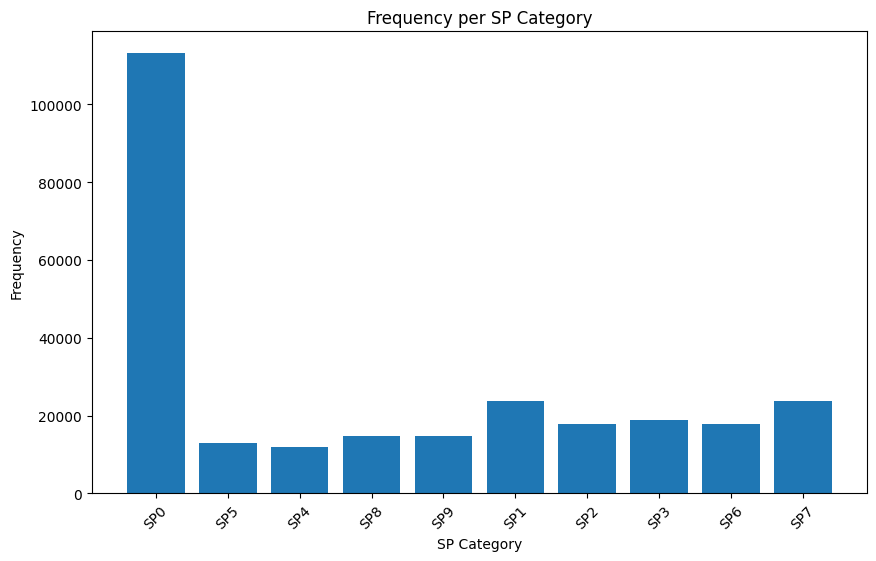

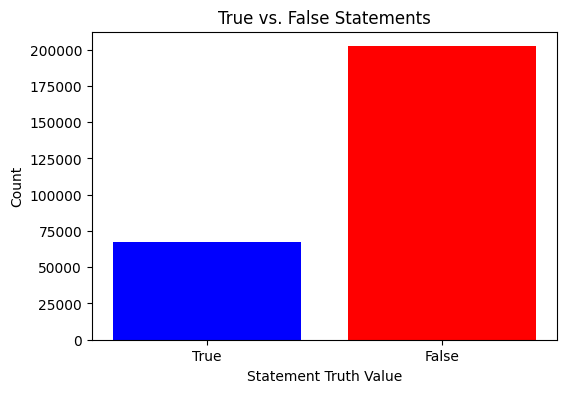

Vocabulary size: 25364


In [143]:
import os
import re
import matplotlib.pyplot as plt
from collections import Counter

def eda_on_text_files(directory):
    sp_frequencies = Counter()
    true_false_counts = {'True': 0, 'False': 0}
    vocabulary = set()
    
    # Step 1: Read the Text Files
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r') as file:
                for line in file:
                    # Step 2: Extract Information
                    sp_category = re.match(r"(SP\d+):", line)
                    truth_value = "True" if ": True :" in line else "False"
                    words = re.findall(r"\b\w+\b", line)
                    
                    if sp_category:
                        sp_frequencies[sp_category.group(1)] += 1
                        true_false_counts[truth_value] += 1
                        vocabulary.update(words)
    
    # Step 3: Analyze Data - Already done during extraction
    
    # Step 4: Plot Results
    # Frequency per SP category
    plt.figure(figsize=(10, 6))
    plt.bar(sp_frequencies.keys(), sp_frequencies.values())
    plt.title('Frequency per SP Category')
    plt.xlabel('SP Category')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
    
    # True vs. False count
    plt.figure(figsize=(6, 4))
    plt.bar(true_false_counts.keys(), true_false_counts.values(), color=['blue', 'red'])
    plt.title('True vs. False Statements')
    plt.xlabel('Statement Truth Value')
    plt.ylabel('Count')
    plt.show()
    
    # Optional: Print vocabulary size
    print(f"Vocabulary size: {len(vocabulary)}")
    return vocabulary

# Specify the directory containing your text files
# directory = '/path/to/your/text/files'
vocab = eda_on_text_files(directory)


In [147]:
# Load pre-trained model tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Specify the GPU device
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the specified GPU

def get_bert_embeddings(words):
    """Get embeddings for a list of words using BERT"""
    with torch.no_grad():  # No need to compute gradients
        embeddings = []
        for word in words:
            inputs = tokenizer(word, return_tensors="pt").to(device)
            outputs = model(**inputs)
            # Use the pooled output (representing the entire sequence)
            pooled_output = outputs.pooler_output
            embeddings.append(pooled_output[0].cpu().numpy())
    return embeddings

# Obtain embeddings
word_embeddings = get_bert_embeddings(vocab)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [148]:

# Convert list of embeddings into a 2D array
embeddings_array = np.array(word_embeddings)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_array)


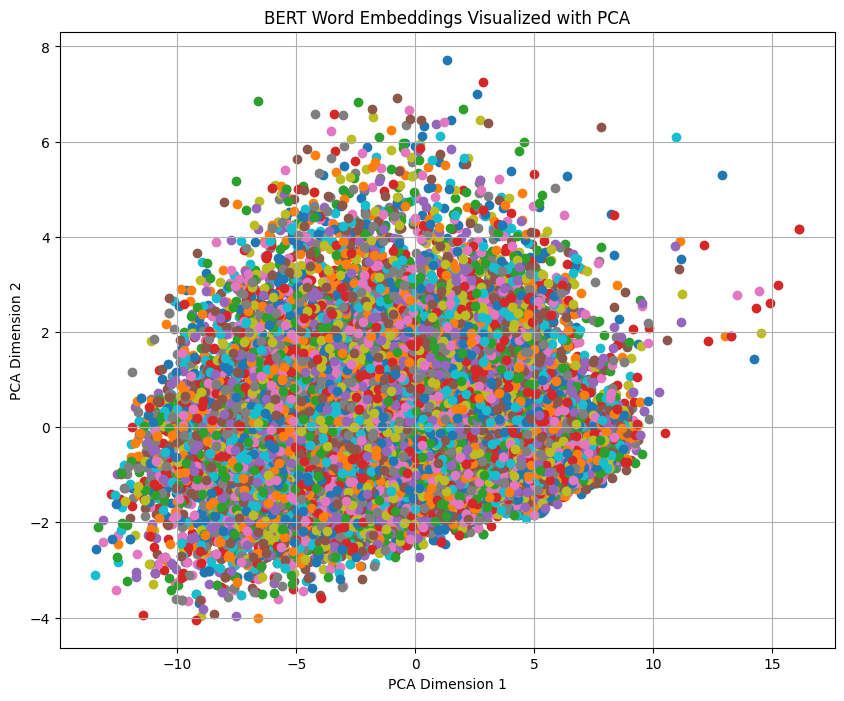

In [151]:
plt.figure(figsize=(10, 8))
for word, embedding in zip(vocab, reduced_embeddings):
    plt.scatter(embedding[0], embedding[1])
#     plt.text(embedding[0] + 0.02, embedding[1] + 0.02, word, fontsize=12)
plt.title('BERT Word Embeddings Visualized with PCA')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.grid(True)
plt.show()


/home/csgrad/sahmed9/anaconda3/envs/layoutlmv3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


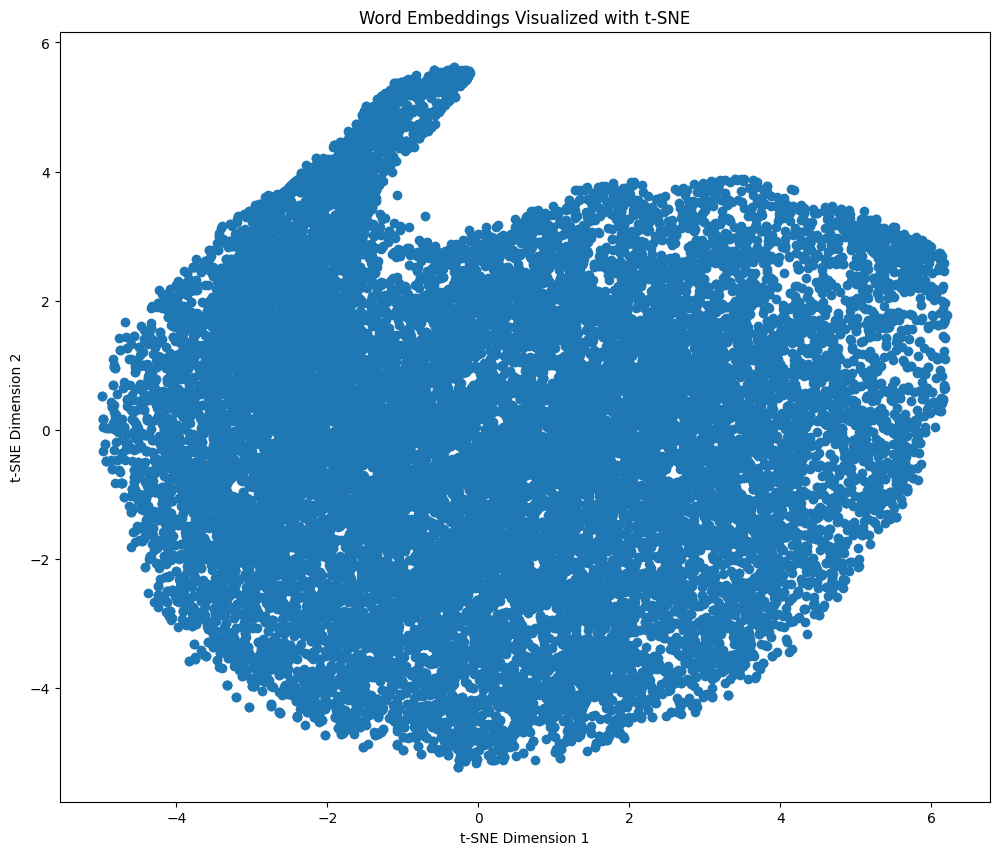

In [157]:

# Step 1: Preprocessing with PCA
pca = PCA(n_components=50)
pca_result = pca.fit_transform(word_embeddings)

# Step 2: Applying t-SNE
tsne = TSNE(n_components=3, perplexity=40, n_iter=300, learning_rate=200)
tsne_result = tsne.fit_transform(pca_result)

# Visualization
plt.figure(figsize=(12, 10))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('Word Embeddings Visualized with t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

***

In [160]:
demo_data =  [
  {
    "id": "997bb945-628d-4724-b370-b84de974a19f",
    "image": "part-000001/997bb945-628d-4724-b370-b84de974a19f.jpg",
    "conversations": [
      {
        "from": "human",
        "value": "<image>\nWrite a prompt for Stable Diffusion to generate this image."
      },
      {
        "from": "gpt",
        "value": "a beautiful painting of chernobyl by nekro, pascal blanche, john harris, greg rutkowski, sin jong hun, moebius, simon stalenhag. in style of cg art. ray tracing. cel shading. hyper detailed. realistic. ue 5. maya. octane render. "
      },
    ]
  },
  ...
]

In [6]:
import random

def get_False(data, texts):
    # Tokenize the data string into words
    words = data.split()
    
    # Determine the number of words to replace. For simplicity, replace up to 1/4 of the words
    num_to_replace = len(words) // 4
    
    # Ensure there's at least one word to replace if possible
    num_to_replace = max(1, num_to_replace) if words else 0
    
    # Randomly select indices in the 'words' list to replace
    indices_to_replace = random.sample(range(len(words)), num_to_replace)
    
    # Perform the replacements
    for idx in indices_to_replace:
        # Select a random replacement word from 'texts'
        replacement_word = random.choice(texts)
        
        # Replace the word in the data at the chosen index
        words[idx] = replacement_word
    
    # Reconstruct the data string from the modified word list
    modified_data = ' '.join(words)
    
    return modified_data

# Example usage
data = "The quick brown fox jumps over the lazy dog"
texts = ["cat", "slow", "green", "smiles", "swiftly"]

# Generate a false version of the data
false_data = get_False(data, texts)
print("Original:", data)
print("Modified:", false_data)


Original: The quick brown fox jumps over the lazy dog
Modified: The quick green cat jumps over the lazy dog


In [103]:
def generate_unique_id():
    return str(uuid.uuid4())

In [104]:
def get_premises(PMC_ID):
    premises = []
    filepath = os.path.join(save_dir, PMC_ID + '.txt')
    with open(filepath, 'r') as file:
        for line in file:
            parts = line.split(":")
            premises.append([_.strip() for _ in parts])
    return premises


def get_qa(PMC_ID):
    filepath = os.path.join(json_dir, PMC_ID + '.json')
    with open(filepath, 'r') as file:
        return json.load(file)
        
        

def get_js(PMC_ID):
    filepath = os.path.join(cjson_dir, PMC_ID + '.json')
    with open(filepath, 'r') as file:
        return json.load(file)
        
        

In [107]:
print(get_premises('PMC1087844___1471-2350-6-15-2'))
# print(get_qa('PMC1087844___1471-2350-6-15-2'))
# /home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/structure_premises/PMC1087844___1471-2350-6-15-2.txt

[['SP0', 'True', 'The type of chart is vertical bar.'], ['SP0', 'False', 'The type of chart is line.'], ['SP0', 'False', 'The type of chart is scatter.'], ['SP0', 'False', 'The type of chart is horizontal box.'], ['SP1', 'True', 'The dependant axis is labeled as Relative copy number.'], ['SP1', 'False', 'The dependant axis is labeled as 15.'], ['SP1', 'False', 'The dependant axis is labeled as 7.'], ['SP1', 'False', 'The dependant axis is labeled as 4.'], ['SP2', 'True', 'The independant axis is labeled as Exon.'], ['SP2', 'False', 'The independant axis is labeled as 1,4.'], ['SP2', 'False', 'The independant axis is labeled as 18.'], ['SP2', 'False', 'The independant axis is labeled as 12.'], ['SP5', 'True', "The independant axis is categorical with the labels ['C3', 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 'C12']."], ['SP4', 'False', 'The independant axis ranges from a minimum of C12 to a maximum of Relative copy number in 7.'], ['SP5', 'False', 'The independant axis is 

In [108]:
def create_to_from_block(q,a):
    return [
        { "from": 'human', "value": q} ,
        { "from": 'gpt', "value": a}
    ]

#---

def get_binary_premise_convo(im, premises) :
    convo = []
    for p in premises :
        unique_id = generate_unique_id()
        p2_ = p[2].strip() + ' Provide True/False response.'
        q = random.choice(['<image>\n'+p2_, p2_+'\n<image>'])
        a = p[1].strip()
        convo.append({
            "id": unique_id,
            "image": im,
            "conversations": create_to_from_block(q, a)
        })
    return convo

def get_premise_convo(im, premises) :
    templates = {
        "SP0": "What is the type of chart ?",
        "SP1": "What is the label of the dependant axis in the chart ?",
        "SP2": "What is the label of the independant axis in the chart ?",
        "SP3": "What is the range and title of the dependant axis in the chart ?",
        "SP4": "What is the range and title of the independant axis in the chart ?",
        "SP5": "Is the independant axis categorical ? What are the tick labels?",
        "SP6": "Are there tick marks for the value plotted on the independant axis ?, provide axis title.",
        "SP7": "Are there tick marks for the value plotted on the dependant axis ?, provide axis title.",
        "SP8": "Is there a legend in the chart ? What are the number of dataseries plotted ?",
        "SP9": "What is the legend label for each data series in the chart, dot they match ?",
    }
    convo = []
    for p in premises :
        if ast.literal_eval(p[1]) :
            unique_id = generate_unique_id()
            q_ = templates[p[0]]
            q = random.choice(['<image>\n'+q_, q_+'\n<image>'])
            a = p[2].strip()
            convo.append({
                "id": unique_id,
                "image": im,
                "conversations": create_to_from_block(q, a)
            })
    return convo

def get_qa_convo(im, qa):
    convo = []
    for q_block in qa: 
        unique_id = q_block['qa_id']
        q_ = q_block['question'].strip()

        if q_block['answer_type'] == 'Ranked List' :
            q_ += ' Provide Answer as a Ranked List, order matters.  Use [..] to denote list elements, nested[[..], [..]] if necessary'    
        if q_block['answer_type'] == 'Unranked List' :
            q_ += ' Provide Answer as an Unranked List. Use [..] to denote list elements, nested[[..], [..]] if necessary'    
        if q_block['answer_type'] == 'Numerical' :
            q_ += ' Provide Numerical Answer Only'    
        if q_block['answer_type'] == 'Binary' :
            q_ += ' Provide Binary Answer Only yes/no'
        if q_block['answer_type'] == 'String' :
            q_ += ' Provide simple string Answer Only not verbose.'  
        
        q = random.choice(['<image>\n'+q_, q_+'\n<image>'])
        a = str(q_block['answer'])
        convo.append({
                "id": unique_id,
                "image": im,
                "conversations": create_to_from_block(q, a)
            })
    return convo
        

def get_js_convo(im, js):
    convo = []
    if check6(js) :
        chart_variables = extract_chart_variables(js)
        unique_id = generate_unique_id()

        q_ = 'Use these chart variables to provide the visual location and data series value for the plot. '
        q_ += str(chart_variables)
        q_ += '. Provide just structured json as x, y coordinates for visual location and intrapolated axis data values at that xy location and legend label names for data series in the following template'
        jsct = js['task1']['output']['chart_type']
        if jsct == "line" :
            q_ += ' {"data series": [{"data": [{"x": line - x - value at corresponding visual location,"y": line - y - value at corresponding visual location}, {...}, ...],"name": "data series name"}],"visual elements": {"lines": [[{"x": line-keypoint x value,"y": line-keypoint y value}, {..}, ..]]}}'
        if jsct == "horizontal bar" or  jsct == "vertical bar" :
            q_ += ' {"data series": [{"data": [{"x": independant axis value,"y": dependant axis value}, {...},...],"name": "[unnamed data series #0]"}],"visual elements": {"bars": [{"height": height of bar in px,"width": width of bar in px,"x0": bar bounding-box x coordinate,"y0": bar bounding-box y coordinate}, { ... }, ..... ]}}'
        if jsct == "vertical box" :
            q_ += ' {"data series": [{"data": [{"first_quartile": y axis tick value for first quartile whisker,"max": y axis tick value for maximum,"median": y axis tick value for median whisker,"min": y axis tick value for minimum whisker,"third_quartile": y axis tick value for third quartile whisker,"x": x axis tick value}],"name": data series name}],"visual elements": {"boxplots": [{"first_quartile": {"x": x coordinate value,"y": y coordinate value},"max": {"x": x coordinate value,"y": y coordinate value},"median": {"x": x coordinate value,"y": y coordinate value},"min": {"x": x coordinate value,"y": y coordinate value},"third_quartile": {"x": x coordinate value,"y": y coordinate value}}, {...}, ....]}}' 
        if jsct == "scatter" :
            q_ += '  {"data series": [{"data": [{"x": x value of a point in first data series,"y": y value of a point in first data series}, {...}, ...],"name": first data series name},{"data": [{"x": x value of a point in second data series,"y": y value of a point in second data series}, {...}, ...],"name": second data series name}, {...}, ...],"visual elements": {"scatter points": [[{"x": x coordinate of a point in first data series , "y": y coordinate of a point in first data series }, {...}, ...],[{"x": x coordinate of a point in second data series , "y": y coordinate of a point in second data series }, {...}, ...], [...] ...]}}' 
        q = random.choice(['<image>\n'+q_, q_+'\n<image>'])
        
        a = js['task6']['output']
        a_vis = {k: v for k, v in a['visual elements'].items() if v}
        a['visual elements'] = a_vis
        convo.append({
                "id": unique_id,
                "image": im,
                "conversations": create_to_from_block(q, a)
            })
    return convo
        
    
    

In [11]:
img_path = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/all_test_train_22/images/PMC3218064___g004.jpg'
premises= get_premises('PMC1087844___1471-2350-6-15-2')
qa_block = get_qa('PMC1087844___1471-2350-6-15-2')
js = get_js('PMC1087844___1471-2350-6-15-2')
# for k in get_binary_premise_convo(img_path, premises) :
#     print('\n')
#     for k_ in k : 
#         print(k_, ' \t', k[k_])
# print('----')
# for k in get_premise_convo(img_path, premises) :
#     print('\n')
#     for k_ in k : 
#         print(k_, ' \t', k[k_])

# print('----')
# for k in get_qa_convo(img_path, qa_block) :
#     print('\n')
#     for k_ in k : 
#         print(k_, ' \t', k[k_])
# print('----')
# for k in get_js_convo(img_path, js) :
#     print('\n')
#     for k_ in k : 
#         print(k_, ' \t', k[k_])

In [111]:
print(img_dir)
# print(os.listdir(img_dir)[0])
fiii = [k for k in os.listdir(img_dir) if k[:-4] not in test_filenames]
# fiii = [k for k in os.listdir(img_dir) if k[:-4] in test_filenames]

# fiii = os.listdir(img_dir)
print(len(fiii), fiii[7])

/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/all_test_train_22/images
18909 PMC3832807___fgene-04-00244-g0003.jpg


In [1]:
a = [1,2,3]
a.extend([4,5,6])
print(a)

[1, 2, 3, 4, 5, 6]


In [112]:
## ONLY Binary Premises aka FOL - use these for verifying FOLS  
save_instruction_js = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/test_binary_premise.json'
save_instruction_js1 = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/test_binary_premise1.json'
save_instruction_js2 = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/test_binary_premise2.json'
save_instruction_js3 = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/test_binary_premise3.json'
save_instruction_js4 = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/test_binary_premise4.json'

##  Premises aka , premise statement - use these for verifying DENSE CHART PREDICTION  
# save_instruction_js = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/test_dense_predict.json'

## Only REAL CQA  TEST SET  - use these for verifying NLP CHART QA 
# save_instruction_js = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/instructions_qa_test9357.json'

## MINI TEST for rapid validation 
# save_instruction_js = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/instructions_test_data_mini.json'

## ALL CLEANED TEST 
# save_instruction_js = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/instructions_test_data_clean.json'


def create_premise_llava():
    data = []
    for img_filename in tqdm.tqdm(fiii):
        # Extract PMC_ID from the image filename
#         PMC_ID = 'PMC5452831___materials-06-04817-g011'#
        PMC_ID = img_filename[:-4]
        img_path = os.path.join(img_dir, img_filename)
        premises = get_premises(PMC_ID)
#         print('premises', premises[:3])
#         qa_block = get_qa(PMC_ID)
#         print('qa_block', qa_block[:3])
#         js_block = get_js(PMC_ID)
#         print('js_block', js_block)

        data.extend(get_binary_premise_convo(img_path, premises))
#         print('\n\n Total Binary premise Pairs', len(data))
#         for d in data : 
#             print(d['conversations'])
#         data.extend(get_premise_convo(img_path, premises))
#         print('\n\n Total premise Pairs', len(data))
#         for d in data : 
#             print(d['conversations'])
#         data.extend(get_qa_convo(img_path, qa_block))
#         print('\n\n Total QA Pairs', len(data))
#         for d in data : 
#             print(d['conversations'])
#         break
    
    print('Total Instructions:', len(data))
#     n = int(len(data)/4)
#     data1 = data[:n]
#     data2 = data[n:2*n]
#     data3 = data[2*n:3*n]
#     data4 = data[3*n:]
#     print('Total Instructions:', len(data1), len(data2), len(data3), len(data4), len(data1)+len(data2)+ len(data3)+len(data4))
    
#     with open(save_instruction_js1, "w") as f:
#         json.dump(data1, f, indent=4)
#     with open(save_instruction_js2, "w") as f:
#         json.dump(data2, f, indent=4)
#     with open(save_instruction_js3, "w") as f:
#         json.dump(data3, f, indent=4)
#     with open(save_instruction_js4, "w") as f:
#         json.dump(data4, f, indent=4)
        
    return 

create_premise_llava()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18909/18909 [01:38<00:00, 191.66it/s]

Total Instructions: 210660


In [13]:
file_stats = os.stat(save_instruction_js)
print(f'File Size in GB is {file_stats.st_size / (1024 * 1024*1024)}')

File Size in GB is 1.8560832990333438


In [15]:
data = json.load(open(save_instruction_js, 'r'))

In [110]:
# print(len(data))
with open(filter_list, 'r') as file:
    test_filenames = {line.strip() for line in file}
print(len(test_filenames))
for k in test_filenames :
    print(k)
    break

9357
PMC7415038___12_HTML


In [27]:
train_data = []
test_data = []

for item in data:
    img_filename = item["image"].split('/')[-1]
    PMC_ID = img_filename[:-4]
    if PMC_ID in test_filenames:
        test_data.append(item)
    else:
        train_data.append(item)

with open('/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/instructions_train_data.json', 'w') as file:
    json.dump(train_data, file, indent=4)
print('train_data', len(train_data))
with open('/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/instructions_test_data.json', 'w') as file:
    json.dump(test_data, file, indent=4)
print('test_data', len(test_data))

train_data 1915241
test_data 446652


In [28]:
file_stats = os.stat('/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/instructions_train_data.json')
print(f'File Size in GB is {file_stats.st_size / (1024 * 1024*1024)}')
file_stats = os.stat('/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/instructions_test_data.json')
print(f'File Size in GB is {file_stats.st_size / (1024 * 1024*1024)}')

File Size in GB is 1.4810290457680821
File Size in GB is 0.3750542551279068


In [59]:
trd= '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/instructions_train_data.json' 
f = json.load(open(trd, 'r'))

In [81]:
trd= '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/instructions_test_data.json' 
f2 = json.load(open(trd, 'r'))

In [70]:
output_directory = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/cleaned_jsons/'
qaid = {}
for js in os.listdir(output_directory):
    __ = os.path.join(output_directory, js)
    jsobj = json.load(open(__, 'r'))
    for js_ in jsobj : 
        qaid.update({js_['qa_id']: js_})

In [71]:
len(qaid)

1763478

In [82]:
new_data2 = []
for item in tqdm.tqdm(f2):
    if len(item['id']) == 12 and item['id'] in qaid: 
        new_data2.append(item)
    if len(item['id']) > 12 :
        new_data2.append(item)
        
        

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 446652/446652 [00:00<00:00, 1262902.26it/s]


In [83]:
print(len(f), len(new_data), len(f2), len(new_data2))

1915241 1702191 446652 398502


In [88]:
test_mini= random.sample(new_data2, 2000)

In [90]:
test_mini

[{'id': 'wdtoQLlYtutO',
  'image': '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/all_test_train_22/images/PMC3653909___5.jpg',
  'conversations': [{'from': 'human',
    'value': "What is the ratio of the values of 'DNA/protein ratio' for ^{m}CG at CXXC^{Tet3} to that at Tet1? Provide Numerical Answer Only\n<image>"},
   {'from': 'gpt', 'value': '0.1331146237200518'}]},
 {'id': 'vhtQTTNdXYLU',
  'image': '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/all_test_train_22/images/PMC5874706___4.jpg',
  'conversations': [{'from': 'human',
    'value': "<image>\nBetween C4H9 and C8H17, which one has the peak value of 'Hemolysis (%)'? Provide simple string Answer Only not verbose."},
   {'from': 'gpt', 'value': 'C4H9'}]},
 {'id': 'hKFXaufuyqAk',
  'image': '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/all_test_train_22/images/PMC5917436___F0023_OC.jpg',
  'conversations': [{'from': 'human',
    'value': 'What is the starting value on dependent axis? Provide Numerical Answer Only\n<image

***

In [80]:
with open('/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/instructions_train_data_clean.json', 'w') as file:
    json.dump(new_data, file, indent=4)
print('train_data', len(new_data))

train_data 1702191


In [84]:
with open('/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/instructions_test_data_clean.json', 'w') as file:
    json.dump(new_data2, file, indent=4)
print('test_data', len(new_data2))

test_data 398502


In [89]:
with open('/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/instructions_test_data_mini.json', 'w') as file:
    json.dump(test_mini, file, indent=4)
print('test_data_mini', len(test_mini))

test_data_mini 2000


In [114]:
import json
import matplotlib.pyplot as plt

# Path to the JSON file
file_path = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/DP_RP/DP_RP.json'
mini = {}
# Load the JSON data from the file
with open(file_path, 'r') as file:
    data = json.load(file)
total= 0
for fl in data :
    dp = data[fl]['DP']
    rp = data[fl]['RP']
    mp = data[fl]['MP']
#     dp = data[fl]['DP'][:25]
#     rp = data[fl]['RP'][:25]
#     mp = data[fl]['MP'][:25]

    mini[fl]= {'DP':dp, 'RP':rp, 'MP':mp}
    total+= len(dp) + len(rp) + len(mp)

print('Total', total)
# Initialize lists to store the lengths of DP, RP, and MP
dp_lengths = []
rp_lengths = []
mp_lengths = []

# Iterate through each entry in the JSON data
for filename, content in mini.items():
    dp_lengths.append(len(content.get('DP', [])))  # Get the length of DP list, default to empty list if not present
    rp_lengths.append(len(content.get('RP', [])))  # Get the length of RP list
    mp_lengths.append(len(content.get('MP', [])))  # Get the length of MP list

print('DP', sum(dp_lengths))
print('RP', sum(rp_lengths))
print('MP', sum(mp_lengths))
# # Plotting the histogram for DP lengths
# plt.figure(figsize=(10, 6))
# plt.hist(dp_lengths, bins=max(dp_lengths) - min(dp_lengths), alpha=0.5, label='DP Lengths')
# plt.hist(rp_lengths, bins=max(rp_lengths) - min(rp_lengths), alpha=0.5, label='RP Lengths')
# plt.hist(mp_lengths, bins=max(mp_lengths) - min(mp_lengths), alpha=0.5, label='MP Lengths')
# plt.xlabel('Lengths')
# plt.ylabel('Frequency')
# plt.title('Histogram of DP, RP, and MP Lengths')
# plt.legend()
# plt.show()


Total 1945968
DP 1609374
RP 328293
MP 8301


In [84]:
dp_lengths

[18,
 18,
 0,
 210,
 0,
 360,
 36,
 24,
 20,
 18,
 12,
 100,
 207,
 1980,
 1900,
 42,
 33,
 372,
 732,
 738,
 864,
 102,
 312,
 12,
 0,
 20,
 60,
 100,
 684,
 250,
 18,
 4770,
 56,
 12,
 948,
 3,
 1442,
 10,
 18,
 24,
 56,
 12,
 3,
 12,
 30,
 504,
 36,
 60,
 882,
 300,
 100,
 12,
 120,
 30,
 156,
 207,
 90,
 1256,
 24,
 1080,
 30,
 18,
 6,
 420,
 18,
 30,
 153,
 0,
 0,
 300,
 9520,
 24,
 6,
 30,
 1832,
 54,
 30,
 6,
 12,
 30,
 42,
 90,
 60,
 168,
 10,
 12,
 504,
 18,
 60,
 59,
 133,
 12,
 1332,
 150,
 156,
 0,
 100,
 2,
 12,
 100,
 120,
 23,
 60,
 150,
 20,
 33,
 12,
 100,
 0,
 300,
 24,
 72,
 18,
 60,
 0,
 7,
 0,
 133,
 360,
 420,
 1710,
 12,
 100,
 12,
 12,
 54,
 153,
 20,
 0,
 54,
 210,
 6,
 3,
 18,
 12,
 24,
 10500,
 12,
 258,
 360,
 0,
 250,
 12,
 24,
 550,
 48,
 102,
 42,
 1320,
 0,
 150,
 18,
 30,
 30,
 0,
 52,
 18,
 100,
 288,
 30,
 33,
 30,
 52,
 130,
 20,
 0,
 8,
 3,
 1872,
 100,
 264,
 153,
 21735,
 1360,
 7,
 1710,
 360,
 12,
 6,
 20,
 30,
 24,
 18,
 52,
 48,
 864,
 30,
 46

***

In [85]:
rp_lengths

[8,
 6,
 0,
 105,
 0,
 108,
 12,
 8,
 10,
 6,
 6,
 30,
 99,
 450,
 570,
 14,
 15,
 112,
 181,
 360,
 216,
 21,
 76,
 4,
 0,
 5,
 15,
 30,
 158,
 120,
 6,
 965,
 28,
 4,
 218,
 1,
 294,
 3,
 6,
 6,
 28,
 4,
 1,
 4,
 9,
 126,
 12,
 18,
 222,
 55,
 30,
 4,
 30,
 15,
 38,
 99,
 45,
 288,
 8,
 235,
 9,
 6,
 3,
 90,
 6,
 10,
 37,
 0,
 0,
 75,
 2040,
 8,
 2,
 10,
 456,
 18,
 10,
 3,
 4,
 10,
 21,
 24,
 18,
 80,
 3,
 4,
 126,
 6,
 18,
 29,
 63,
 4,
 331,
 45,
 78,
 0,
 30,
 1,
 4,
 30,
 30,
 11,
 18,
 45,
 10,
 15,
 6,
 30,
 8,
 55,
 8,
 18,
 6,
 18,
 0,
 3,
 0,
 63,
 90,
 105,
 513,
 4,
 30,
 4,
 6,
 18,
 37,
 5,
 0,
 18,
 63,
 3,
 1,
 6,
 4,
 8,
 2000,
 4,
 66,
 108,
 0,
 120,
 4,
 8,
 165,
 16,
 48,
 21,
 330,
 0,
 45,
 6,
 7,
 15,
 0,
 24,
 6,
 30,
 51,
 10,
 16,
 15,
 24,
 25,
 10,
 0,
 4,
 1,
 468,
 30,
 60,
 37,
 4319,
 408,
 3,
 335,
 108,
 4,
 3,
 10,
 7,
 6,
 6,
 24,
 16,
 216,
 10,
 108,
 8,
 6,
 67,
 6631,
 24,
 330,
 37,
 468,
 4,
 15,
 22,
 3,
 3,
 4,
 315,
 0,
 6,
 181,
 4,
 150

***

In [86]:
a = [1,2,3]
a[:10]

[1, 2, 3]

In [118]:
import numpy as np

# Define dummy data for sequences and premises
# Each sequence is a list of binary values indicating if a premise is correct (1) or not (0)
sequences = [
    [1, 1, 1, 0],  # Sequence 1
    [1, 1, 0],     # Sequence 2
    [1, 1, 1, 1],  # Sequence 3
    [0, 0, 0],     # Sequence 4
    [1, 1, 0, 0],  # Sequence 5
]

def calculate_acc_vpp(sequences):
    """Calculate the Accuracy for Visual Premise Proving (Acc_VPP)."""
    S = len(sequences)
    total = 0
    for seq in sequences:
        total += np.prod(seq)
    acc_vpp = total / S
    return acc_vpp

def calculate_dcp(sequences):
    """Calculate the Depth of Correct Premises (DCP)."""
    S = len(sequences)
    S_correct = sum(np.prod(seq) for seq in sequences)
    S_incorrect = S - S_correct
    
    if S_incorrect == 0:  # Avoid division by zero
        return 0
    
    total_depth = 0
    for seq in sequences:
        if np.prod(seq) == 0:
            total_depth += sum(seq) / len(seq)
    
    dcp = total_depth / S_incorrect
    return dcp

# Calculate metrics
acc_vpp = calculate_acc_vpp(sequences)
dcp = calculate_dcp(sequences)

print(f"Acc_VPP: {acc_vpp:.3f}")
print(f"DCP: {dcp:.3f}")


Acc_VPP: 0.200
DCP: 0.479


In [119]:
d1 = '/home/csgrad/sahmed9/reps/RealCQA/code/eval_result/binary_struct_148000_1'
d2 = '/home/csgrad/sahmed9/reps/RealCQA/code/eval_result/binary_struct_148000_2'
d3 = '/home/csgrad/sahmed9/reps/RealCQA/code/eval_result/binary_struct_148000_3'
d4 = '/home/csgrad/sahmed9/reps/RealCQA/code/eval_result/binary_struct_148000_4'
combined = '/home/csgrad/sahmed9/reps/RealCQA/code/eval_result/binary_struct_148000'

import os
import json

# # Directory paths
# d1 = '/home/csgrad/sahmed9/reps/RealCQA/code/eval_result/binary_struct_148000_1'
# d2 = '/home/csgrad/sahmed9/reps/RealCQA/code/eval_result/binary_struct_148000_2'
# d3 = '/home/csgrad/sahmed9/reps/RealCQA/code/eval_result/binary_struct_148000_3'
# d4 = '/home/csgrad/sahmed9/reps/RealCQA/code/eval_result/binary_struct_148000_4'
# combined = '/home/csgrad/sahmed9/reps/RealCQA/code/eval_result/binary_struct_148000'

# Ensure the combined directory exists
if not os.path.exists(combined):
    os.makedirs(combined)

# Gather all files from each directory
directories = [d1, d2, d3, d4]
all_files = {}

for directory in directories:
    for file in os.listdir(directory):
        if file.endswith('.json'):  # Check to make sure it's a JSON file
            file_path = os.path.join(directory, file)
            with open(file_path, 'r') as f:
                content = json.load(f)
            if file in all_files:
                # If file exists, extend the list
                all_files[file].extend(content)
            else:
                # Otherwise, create a new entry in the dictionary
                all_files[file] = content

# Write combined files
for file, content in all_files.items():
    combined_path = os.path.join(combined, file)
    with open(combined_path, 'w') as f:
        json.dump(content, f, indent=4)

print("Merging complete. Combined files are stored in:", combined, len(all_files))



Merging complete. Combined files are stored in: /home/csgrad/sahmed9/reps/RealCQA/code/eval_result/binary_struct_148000 9357


***

***

***

***

***

***

***

In [42]:
ln = open(os.path.join(save_dir, 'PMC4555286___ijerph-12-09375-g004.txt'), 'r').readlines()
for k in ln:
    print(k.strip())

SP0: True: The type of chart is horizontal bar.
SP0: False: The type of chart is area.
SP0: False: The type of chart is area.
SP0: False: The type of chart is horizontal box.
SP1: True: The dependant axis is labeled as Ratio Value.
SP1: False: The dependant axis is labeled as heatmap.
SP1: False: The dependant axis is labeled as area.
SP1: False: The dependant axis is labeled as scatter.
SP2: True: The independant axis is labeled as E/Al Ratio.
SP2: False: The independant axis is labeled as pie.
SP2: False: The independant axis is labeled as horizontal bar.
SP2: False: The independant axis is labeled as vertical box.
SP3: True: The dependant axis ranges from a minimum of 1e-05 to a maximum of 100.0 in Ratio Value.
SP3: False: The dependant axis ranges from a minimum of vertical bar to a maximum of vertical box in heatmap.
SP3: False: The dependant axis ranges from a minimum of scatter to a maximum of bar in heatmap.
SP3: False: The dependant axis ranges from a minimum of vertical bar t

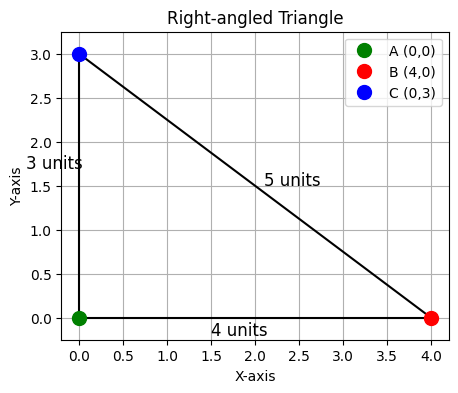

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Coordinates of the triangle's vertices
A = (0, 0)
B = (4, 0)
C = (0, 3)

# Plotting the triangle
plt.figure(figsize=(5,4))
plt.plot([A[0], B[0]], [A[1], B[1]], 'k-') # Base
plt.plot([A[0], C[0]], [A[1], C[1]], 'k-') # Height
plt.plot([B[0], C[0]], [B[1], C[1]], 'k-') # Hypotenuse

# Adding points for the vertices
plt.plot(*A, 'go', markersize=10, label='A (0,0)')
plt.plot(*B, 'ro', markersize=10, label='B (4,0)')
plt.plot(*C, 'bo', markersize=10, label='C (0,3)')

# Adding text labels for the sides
plt.text((A[0]+B[0])/2 - 0.5, (A[1]+B[1])/2 - 0.2, '4 units', fontsize=12)
plt.text((A[0]+C[0])/2 - 0.6, (A[1]+C[1])/2 + 0.2, '3 units', fontsize=12)
plt.text((B[0]+C[0])/2 + 0.1, (B[1]+C[1])/2, '5 units', fontsize=12)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.title('Right-angled Triangle')
plt.show()


In [125]:
from manim import *

class PendulumScene(Scene):
    def construct(self):
        # Create a circle to represent the pendulum bob
        bob = Circle(radius=0.2, color=BLUE).shift(DOWN)
        
        # Create a line to represent the string
        string = Line(ORIGIN, DOWN, color=WHITE).set_length(2)
        
        # Group the bob and the string together
        pendulum = VGroup(string, bob)
        
        # Animate the pendulum swinging
        self.play(Rotate(pendulum, angle=PI/4, about_point=ORIGIN))
        self.play(Swing(pendulum, angle=-PI/2, about_point=ORIGIN, rate_func=there_and_back, run_time=2))
        
        self.wait(1)


ModuleNotFoundError: No module named 'manim'

In [227]:
a = '["Real-Time Normal","Real-Time Deletion","MLPA Normal","MLPA Deletion"]'

In [228]:
ast.literal_eval(str(a).strip())


['Real-Time Normal', 'Real-Time Deletion', 'MLPA Normal', 'MLPA Deletion']

In [229]:
a

'["Real-Time Normal","Real-Time Deletion","MLPA Normal","MLPA Deletion"]'

In [92]:
a, b = {0, 1, 273, 289}, {1, 28844, 5399, 4983}

In [95]:
a | b 

{0, 1, 273, 289, 4983, 5399, 28844}

In [10]:
import Levenshtein
def calculate_f1_score(prediction_tokens, reference_tokens, prediction_text, reference_text ):
    # Calculate precision, recall, and F1 score for token matching
#     print(set(prediction_tokens), set(reference_tokens))
    true_positives = len(set(prediction_tokens) & set(reference_tokens))
    if len(prediction_tokens) == 0 or len(reference_tokens) == 0:
        return 0, 0, 0  # Avoid division by zero
    precision = true_positives / len(prediction_tokens)
    recall = true_positives / len(reference_tokens)
    f1_score_token = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # exit()

    # Calculate edit distance
    edit_distance = Levenshtein.distance(prediction_text, reference_text)

    # Calculate precision, recall, and F1 score for edit distance
    max_length = max(len(prediction_text), len(reference_text))
    precision_edit = 1 - (edit_distance / max_length) if max_length != 0 else 0
    recall_edit = 1 - (edit_distance / max_length) if max_length != 0 else 0
    f1_score_edit = 2 * (precision_edit * recall_edit) / (precision_edit + recall_edit) if (precision_edit + recall_edit) != 0 else 0

    return f1_score_token, f1_score_edit

prediction_tokens, reference_tokens = [1, 2, 4, 3], [1, 2, 3, 4]
prediction_text, reference_text = 'aas', 'aas'
calculate_f1_score(prediction_tokens, reference_tokens, prediction_text, reference_text )


(1.0, 1.0)

In [54]:
import Levenshtein

def evaluate_text_similarity(prediction_text, reference_text):
    # Calculate edit distance
    edit_distance = Levenshtein.distance(prediction_text, reference_text)

    # Calculate precision, recall, and F1 score for edit distance
    max_length = max(len(prediction_text), len(reference_text))
    precision_edit = 1 - (edit_distance / max_length) if max_length != 0 else 0
    recall_edit = 1 - (edit_distance / max_length) if max_length != 0 else 0
    # Since precision and recall are equal in this method, the formula simplifies to:
    f1_score_edit = precision_edit  # Because precision_edit == recall_edit in this calculation

    return edit_distance, precision_edit, recall_edit, f1_score_edit


def extract_chart_type(predicted_answer):
    """Extracts the chart type from the predicted answer."""
    match = re.search(r'the type of chart is (.+?)\.', predicted_answer.lower())
    if match:
        return match.group(1).strip()
    return ""


# Example usage:
predicted_answer = "The type of chart is vertical box."
actual_chart_type = "vertical box"
extracted_type = extract_chart_type(predicted_answer)

edit_distance, precision, recall, f1_score = evaluate_text_similarity(extracted_type, actual_chart_type.lower())

print(f"Edit Distance: {edit_distance}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Edit Distance: 0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [7]:
import sacrebleu 

def calculate_bleu_score(pred,label):
    # Calculate BLEU score
    bleu_score = sacrebleu.corpus_bleu(pred,label)
    return bleu_score.score


In [12]:
prediction_text = reference_text = 'ou can use the tensor.to(device) command to move a tensor to a device.The .to() command is also used to move a whole model to a device, like in the post you linked to.Another possibility is to set the device of a tensor during creation using the device= keyword argument, like in t = torch.tensor(some_list, device=device) To set the device dynamically in your code, you can use'
calculate_bleu_score(prediction_text, reference_text)

0.0

In [60]:
# Re-import necessary libraries and re-define the regular expressions and parsing logic
import re
import matplotlib.pyplot as plt

# Define regular expressions
checkpoint_pattern = re.compile(r"Model Checkpoint: (.+?)\.pt")
bleu_pattern = re.compile(r"Average BLEU Score: ([\d\.]+)")
f1_token_pattern = re.compile(r"Average F1 Score \(Token Matching\): ([\d\.]+)")
f1_edit_pattern = re.compile(r"Average F1 Score \(Edit Distance\): ([\d\.]+)")

# Initialize dictionary to store evaluation results
evaluation_results = {}

# Path to the report file
file_path = 'evaluation_report.txt'

# Read and process the file line by line
with open(file_path, "r") as file:
    current_checkpoint = None
    for line in file:
        if 'Model Checkpoint:' in line:
#             current_checkpoint = checkpoint_pattern.search(line).group(1).split('_')[-1]
            current_checkpoint = checkpoint_pattern.search(line).group(1)
            if current_checkpoint not in evaluation_results:
                evaluation_results[current_checkpoint] = {'bleu': 0, 'f1_token': 0, 'f1_edit': 0}
            continue
        
        bleu_match = bleu_pattern.search(line)
        f1_token_match = f1_token_pattern.search(line)
        f1_edit_match = f1_edit_pattern.search(line)
        
        if bleu_match and current_checkpoint:
            evaluation_results[current_checkpoint]['bleu'] = max(float(bleu_match.group(1)), evaluation_results[current_checkpoint]['bleu'])
        if f1_token_match and current_checkpoint:
            evaluation_results[current_checkpoint]['f1_token'] = max(float(f1_token_match.group(1)),evaluation_results[current_checkpoint]['f1_token'])
        if f1_edit_match and current_checkpoint:
            evaluation_results[current_checkpoint]['f1_edit'] = max(float(f1_edit_match.group(1)),evaluation_results[current_checkpoint]['f1_edit'])

# Convert checkpoint names to sortable integers
# Assuming the checkpoint format is always 'checkpoint_epoch_X_step_Y.pt' and we sort by Y
sorted_checkpoints = sorted(evaluation_results.keys(), key=lambda x: int(x.split('_')[-1]))

# Prepare data for plotting
bleu_scores = [evaluation_results[chk]['bleu'] for chk in sorted_checkpoints]
f1_token_scores = [evaluation_results[chk]['f1_token'] for chk in sorted_checkpoints]
f1_edit_scores = [evaluation_results[chk]['f1_edit'] for chk in sorted_checkpoints]

print(len(sorted_checkpoints), len(bleu_scores), len(f1_token_scores), len(f1_edit_scores))

157 157 157 157


In [64]:
# Now let's find the max for each metric and their corresponding ranks
max_bleu = max(bleu_scores)
max_f1_token = max(f1_token_scores)
max_f1_edit = max(f1_edit_scores)

# Find the checkpoint index for the max of each metric
max_bleu_index = bleu_scores.index(max_bleu)
max_f1_token_index = f1_token_scores.index(max_f1_token)
max_f1_edit_index = f1_edit_scores.index(max_f1_edit)

# Extract the checkpoint values for the max of each metric
max_bleu_checkpoint = sorted_checkpoints[max_bleu_index]
max_f1_token_checkpoint = sorted_checkpoints[max_f1_token_index]
max_f1_edit_checkpoint = sorted_checkpoints[max_f1_edit_index]

# Now let's calculate the ranks for each max
# For the checkpoint with max BLEU score, get the ranks of F1 Token and F1 Edit
rank_f1_token_at_max_bleu = sorted(f1_token_scores, reverse=True).index(f1_token_scores[max_bleu_index]) + 1
rank_f1_edit_at_max_bleu = sorted(f1_edit_scores, reverse=True).index(f1_edit_scores[max_bleu_index]) + 1

# For the checkpoint with max F1 Token score, get the ranks of BLEU and F1 Edit
rank_bleu_at_max_f1_token = sorted(bleu_scores, reverse=True).index(bleu_scores[max_f1_token_index]) + 1
rank_f1_edit_at_max_f1_token = sorted(f1_edit_scores, reverse=True).index(f1_edit_scores[max_f1_token_index]) + 1

# For the checkpoint with max F1 Edit score, get the ranks of BLEU and F1 Token
rank_bleu_at_max_f1_edit = sorted(bleu_scores, reverse=True).index(bleu_scores[max_f1_edit_index]) + 1
rank_f1_token_at_max_f1_edit = sorted(f1_token_scores, reverse=True).index(f1_token_scores[max_f1_edit_index]) + 1

# Now we construct the final result as specified
result = {
    'x_value_1': {
        'token': (1, max_f1_token, max_f1_token_index),
        'bleu': (rank_bleu_at_max_f1_token, bleu_scores[max_f1_token_index]),
        'edit_score': (rank_f1_edit_at_max_f1_token, f1_edit_scores[max_f1_token_index])
    },
    'x_value_2': {
        'token': (rank_f1_token_at_max_bleu, f1_token_scores[max_bleu_index]),
        'bleu': (1, max_bleu, max_bleu_index),
        'edit_score': (rank_f1_edit_at_max_bleu, f1_edit_scores[max_bleu_index])
    },
    'x_value_3': {
        'token': (rank_f1_token_at_max_f1_edit, f1_token_scores[max_f1_edit_index]),
        'bleu': (rank_bleu_at_max_f1_edit, bleu_scores[max_f1_edit_index]),
        'edit_score': (1, max_f1_edit, max_f1_edit_index)
    }
}



In [65]:
result

{'x_value_1': {'token': (1, 0.17820989555309308, 123),
  'bleu': (26, 13.588499419480536),
  'edit_score': (18, 0.15162451166852922)},
 'x_value_2': {'token': (21, 0.17541351804548955),
  'bleu': (1, 13.90775278765291, 143),
  'edit_score': (1, 0.1540961817986856)},
 'x_value_3': {'token': (21, 0.17541351804548955),
  'bleu': (1, 13.90775278765291),
  'edit_score': (1, 0.1540961817986856, 143)}}

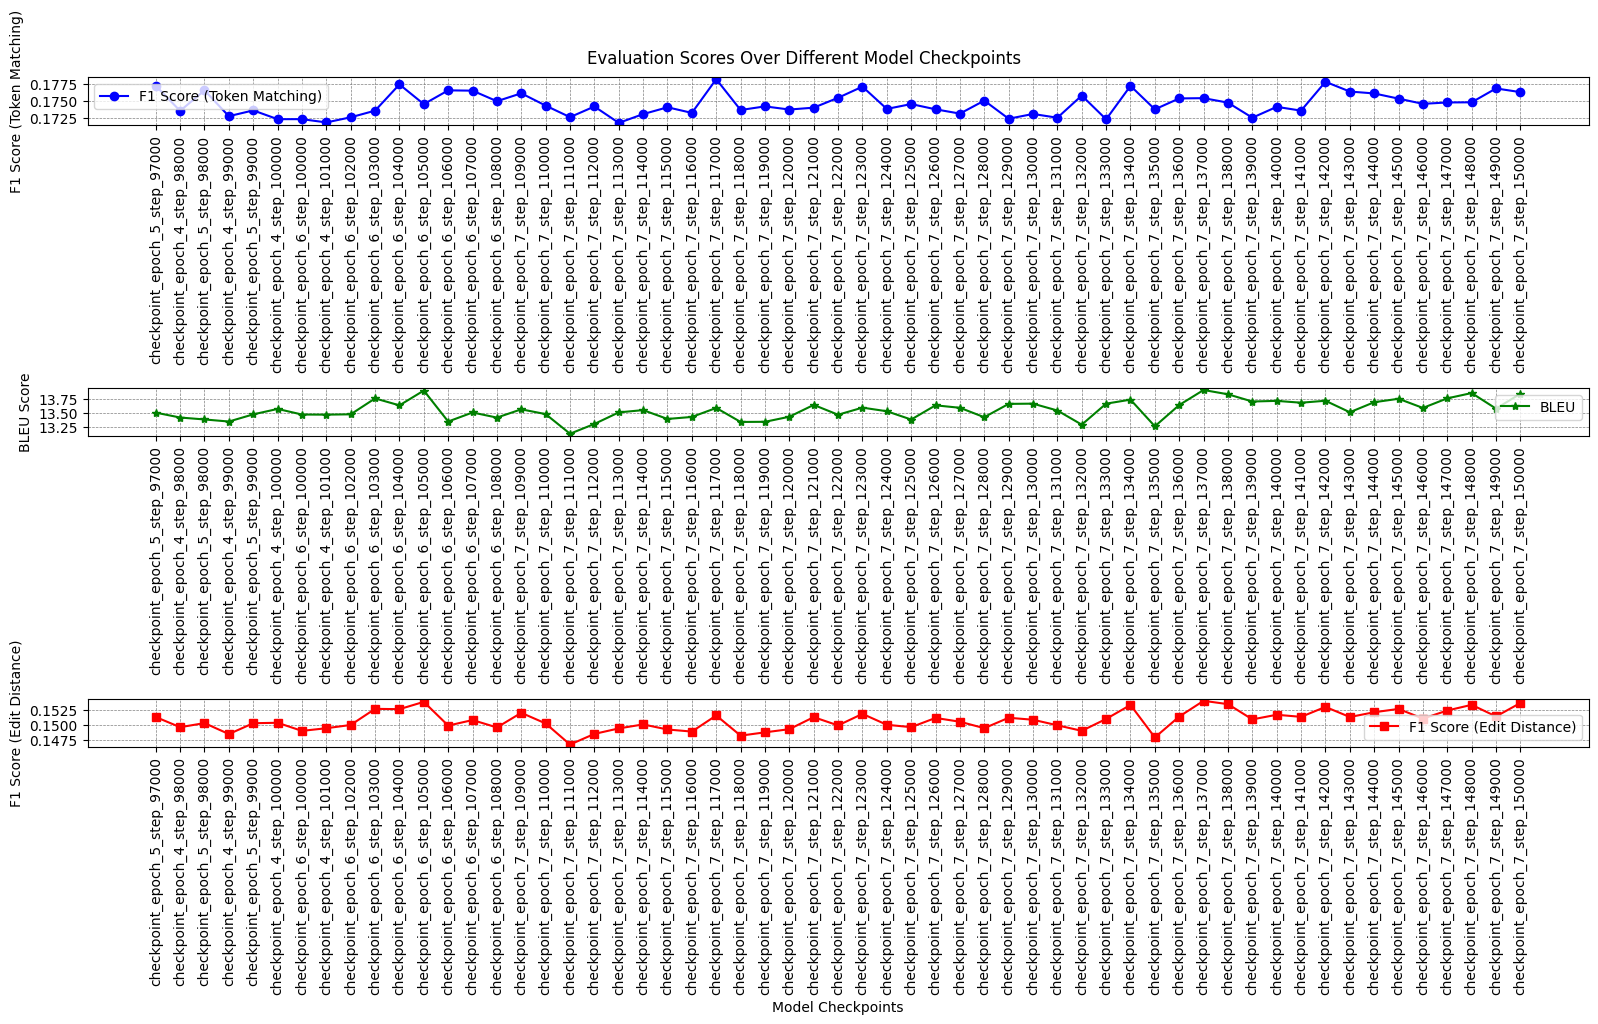

In [61]:
import matplotlib.pyplot as plt

# Create a figure and axes for each plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 10))

# Plot F1 Score (Token Matching)
# ax1.plot(sorted_checkpoints, f1_token_scores, marker='o', linestyle='-', color='b', label="F1 Score (Token Matching)")
ax1.plot(sorted_checkpoints[100:], f1_token_scores[100:], marker='o', linestyle='-', color='b', label="F1 Score (Token Matching)")

ax1.set_ylabel("F1 Score (Token Matching)")
ax1.legend()
ax1.grid(True, linestyle='--', color='gray', linewidth=0.5)
ax1.tick_params(axis='x', rotation=90)  # Rotate x ticks

# Plot BLEU Score
# ax2.plot(sorted_checkpoints, bleu_scores, marker='*', linestyle='-', color='g', label="BLEU")
ax2.plot(sorted_checkpoints[100:], bleu_scores[100:], marker='*', linestyle='-', color='g', label="BLEU")
ax2.set_ylabel("BLEU Score")
ax2.legend()
ax2.grid(True, linestyle='--', color='gray', linewidth=0.5)
ax2.tick_params(axis='x', rotation=90)  # Rotate x ticks

# Plot F1 Score (Edit Distance)
# ax3.plot(sorted_checkpoints, f1_edit_scores, marker='s', linestyle='-', color='r', label="F1 Score (Edit Distance)")
ax3.plot(sorted_checkpoints[100:], f1_edit_scores[100:], marker='s', linestyle='-', color='r', label="F1 Score (Edit Distance)")
ax3.set_ylabel("F1 Score (Edit Distance)")
ax3.set_xlabel("Model Checkpoints")
ax3.legend()
ax3.grid(True, linestyle='--', color='gray', linewidth=0.5)
ax3.tick_params(axis='x', rotation=90)  # Rotate x ticks

# Add title and adjust layout
fig.suptitle("Evaluation Scores Over Different Model Checkpoints")
plt.tight_layout()
plt.show()


In [69]:
len(sorted_checkpoints)-143

14

***

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FeatureTransformer(nn.Module):
    def __init__(self):
        super(FeatureTransformer, self).__init__()
        self.conv1 = nn.Conv2d(6*256, 512, kernel_size=1)
        self.norm1 = nn.BatchNorm2d(512)
        self.conv2 = nn.Conv2d(512, 128, kernel_size=1)
        self.norm2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 3, kernel_size=1)
        self.norm3 = nn.BatchNorm2d(3)

    def forward(self, x):
        x = torch.cat((x[0], x[1].squeeze(1)))
        x = self.conv1(x)
        x = self.norm1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = self.norm2(x)
        x = F.relu(x)
        x = self.conv3(x)
        x = self.norm3(x)
        x = F.relu(x) 
        return x

# Example usage
input_tensor = torch.randn(1, 6*256, 128, 128)  # Example input tensor
model = FeatureTransformer()
output_tensor = model(input_tensor)

print(f'Output Tensor Shape: {output_tensor.shape}')


1 torch.Size([1, 1536, 128, 128])
2 torch.Size([1, 512, 128, 128])
3 torch.Size([1, 128, 128, 128])
7 torch.Size([1, 3, 128, 128])
8 torch.Size([1, 3, 128, 128])
Output Tensor Shape: torch.Size([1, 3, 128, 128])


In [42]:
len(input_tensor.size())

4

In [44]:
attention_weights

torch.Size([2, 2048, 2048])
Combined patches: torch.Size([2, 2048, 770])
Output mask: torch.Size([2, 2048])


In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PatchCombinationModule(nn.Module):
    def __init__(self, patch_dim=770, num_patches=2048):
        super(PatchCombinationModule, self).__init__()
        self.patch_dim = patch_dim
        self.num_patches = num_patches
        self.query = nn.Linear(patch_dim, patch_dim)
        self.key = nn.Linear(patch_dim, patch_dim)
        self.value = nn.Linear(patch_dim, patch_dim)

    def forward(self, patches1, patches2, mask1, mask2):
        # Calculate query, key, value
        q1, k1, v1 = self.query(patches1), self.key(patches1), self.value(patches1)
        q2, k2, v2 = self.query(patches2), self.key(patches2), self.value(patches2)

        # Calculate attention scores and apply masks
        attn_scores1 = torch.matmul(q1, k2.transpose(-2, -1)) / (self.patch_dim ** 0.5)
        attn_scores2 = torch.matmul(q2, k1.transpose(-2, -1)) / (self.patch_dim ** 0.5)

        # Apply masks by using a very negative number for masked positions
        mask1_expanded = mask1.unsqueeze(1).expand_as(attn_scores1)
        mask2_expanded = mask2.unsqueeze(1).expand_as(attn_scores2)
        attn_scores1 = attn_scores1.masked_fill(mask1_expanded == 0, float('-inf'))
        attn_scores2 = attn_scores2.masked_fill(mask2_expanded == 0, float('-inf'))

        # Normalize the attention scores
        attn1 = F.softmax(attn_scores1, dim=-1)
        attn2 = F.softmax(attn_scores2, dim=-1)

        # Apply attention to the value vectors
        out1 = torch.matmul(attn1, v2)
        out2 = torch.matmul(attn2, v1)

        # Combine the outputs
        combined_patches = out1 + out2  # Element-wise sum of the outputs

        # Deriving new attention masks from the cosine similarity makes sense as it reflects the relevance of patches across both inputs. 
        # However, directly using cosine similarity scores as masks is not straightforward due to their continuous nature.
        # Instead, you can threshold the softmax-normalized attention scores to generate binary masks, indicating whether a patch is attended to or not.
        # A simple approach could be to set a threshold (e.g., 0.1) and consider attention scores above this as '1' (attended) and below as '0' (not attended).
        # This process will give you a more refined attention mask, focusing on the most relevant patches across both inputs.

        # Generate binary masks from the normalized attention scores
        new_mask1 = torch.where(attn1 > 0.1, torch.ones_like(attn1), torch.zeros_like(attn1)).sum(dim=-1) > 0
        new_mask2 = torch.where(attn2 > 0.1, torch.ones_like(attn2), torch.zeros_like(attn2)).sum(dim=-1) > 0

        # Convert binary masks back to the original mask format
        new_attention_mask = new_mask1.long() + new_mask2.long()  # Union of both masks

        return combined_patches, new_attention_mask

# Example tensors for demonstration
# Assume these tensors are the output from some preprocessing steps
patches1 = torch.rand(2, 2048, 770)  # Simulating flattened patches from the first input
patches2 = torch.rand(2, 2048, 770)  # Simulating flattened patches from the second input
mask1 = torch.ones(2, 2048)  # Simulating attention masks for the first input
mask2 = torch.ones(2, 2048)  # Simulating attention masks for the second input

# Instantiate and apply the PatchCombinationModule
patch_combiner = PatchCombinationModule()
combined_patches, new_attention_mask = patch_combiner(patches1, patches2, mask1, mask2)

print(f"Combined patches shape: {combined_patches.shape}")
print(f"New attention mask shape: {new_attention_mask.shape}")


Combined patches shape: torch.Size([2, 2048, 770])
New attention mask shape: torch.Size([2, 2048])


In [50]:
[list(_) for _ in  new_attention_mask.numpy()]

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [51]:
combined_patches

tensor([[[ 0.3913,  0.0104, -0.6707,  ..., -0.2514,  0.5040,  0.5759],
         [ 0.3910,  0.0106, -0.6706,  ..., -0.2515,  0.5041,  0.5757],
         [ 0.3907,  0.0105, -0.6705,  ..., -0.2519,  0.5034,  0.5759],
         ...,
         [ 0.3908,  0.0102, -0.6706,  ..., -0.2514,  0.5043,  0.5760],
         [ 0.3913,  0.0107, -0.6703,  ..., -0.2510,  0.5038,  0.5759],
         [ 0.3912,  0.0110, -0.6707,  ..., -0.2516,  0.5038,  0.5752]],

        [[ 0.3867,  0.0101, -0.6763,  ..., -0.2452,  0.5014,  0.5818],
         [ 0.3869,  0.0100, -0.6759,  ..., -0.2443,  0.5028,  0.5817],
         [ 0.3870,  0.0098, -0.6763,  ..., -0.2451,  0.5020,  0.5819],
         ...,
         [ 0.3874,  0.0095, -0.6764,  ..., -0.2447,  0.5021,  0.5817],
         [ 0.3864,  0.0099, -0.6764,  ..., -0.2447,  0.5019,  0.5810],
         [ 0.3869,  0.0096, -0.6765,  ..., -0.2445,  0.5022,  0.5817]]],
       grad_fn=<AddBackward0>)

In [ ]:
class CrossAttentionModule(nn.Module):
    def __init__(self, patch_dim=770):
        super(CrossAttentionModule, self).__init__()
        self.patch_dim = patch_dim
        # Defining the MLP for key and query generation
        self.key_mlp = nn.Sequential(
            nn.Linear(patch_dim, patch_dim),
            nn.ReLU(),
            nn.Linear(patch_dim, patch_dim)
        )
        self.query_mlp = nn.Sequential(
            nn.Linear(patch_dim, patch_dim),
            nn.ReLU(),
            nn.Linear(patch_dim, patch_dim)
        )
        # Note: The value is taken directly from p1, so no MLP is needed for it.

    def forward(self, patches1, patches2, mask1, mask2):
        # Apply masks to the patches directly
        p1 = patches1 * mask1.unsqueeze(-1)
        p2 = patches2 * mask2.unsqueeze(-1)

        # Generate key from p1 and query from p2
        key = self.key_mlp(p1)
        query = self.query_mlp(p2)
        value = p1  # Using p1 as the value directly

        # Calculate attention scores
        attn_scores = torch.matmul(query, key.transpose(-2, -1)) / (self.patch_dim ** 0.5)

        # Apply softmax to normalize the attention scores to probabilities
        attn_probs = F.softmax(attn_scores, dim=-1)

        # Multiply by value to get the weighted sum of values
        combined_patches = torch.matmul(attn_probs, value)

        return combined_patches, new_mask

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import argparse
from transformers import Pix2StructProcessor, Pix2StructForConditionalGeneration
# from transformers import (T5TokenizerFast as T5Tokenizer)
from transformers.optimization import Adafactor, get_cosine_schedule_with_warmup
from dataset.rqa_dataset import ChartConvoFeatures  
from torch.utils.data import DataLoader, random_split
import os
import tqdm
import wandb
from torch.nn.parallel import DistributedDataParallel
from torch.utils.data.distributed import DistributedSampler
import uuid
import gc


In [5]:
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [2]:
model_name = 'google/matcha-chartqa'
m1 = Pix2StructForConditionalGeneration.from_pretrained(model_name)

In [7]:
m1

Pix2StructForConditionalGeneration(
  (encoder): Pix2StructVisionModel(
    (embeddings): Pix2StructVisionEmbeddings(
      (patch_projection): Linear(in_features=768, out_features=768, bias=True)
      (row_embedder): Embedding(4096, 768)
      (column_embedder): Embedding(4096, 768)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): Pix2StructVisionEncoder(
      (layer): ModuleList(
        (0): Pix2StructVisionLayer(
          (attention): Pix2StructVisionAttention(
            (query): Linear(in_features=768, out_features=768, bias=False)
            (key): Linear(in_features=768, out_features=768, bias=False)
            (value): Linear(in_features=768, out_features=768, bias=False)
            (output): Linear(in_features=768, out_features=768, bias=False)
          )
          (mlp): Pix2StructVisionMlp(
            (wi_0): Linear(in_features=768, out_features=2048, bias=False)
            (wi_1): Linear(in_features=768, out_features=2048, bias=False)
         

In [4]:
ckpt = torch.load('/home/csgrad/sahmed9/reps/RealCQA/code/outputChartConv_done/checkpoint_epoch_7_step_105000.pt')
print(ckpt.keys())

dict_keys(['model_state_dict', 'optimizer_state_dict', 'epoch', 'step'])
model_state_dict odict_keys(['module.encoder.embeddings.patch_projection.weight', 'module.encoder.embeddings.patch_projection.bias', 'module.encoder.embeddings.row_embedder.weight', 'module.encoder.embeddings.column_embedder.weight', 'module.encoder.encoder.layer.0.attention.query.weight', 'module.encoder.encoder.layer.0.attention.key.weight', 'module.encoder.encoder.layer.0.attention.value.weight', 'module.encoder.encoder.layer.0.attention.output.weight', 'module.encoder.encoder.layer.0.mlp.wi_0.weight', 'module.encoder.encoder.layer.0.mlp.wi_1.weight', 'module.encoder.encoder.layer.0.mlp.wo.weight', 'module.encoder.encoder.layer.0.pre_mlp_layer_norm.weight', 'module.encoder.encoder.layer.0.pre_attention_layer_norm.weight', 'module.encoder.encoder.layer.1.attention.query.weight', 'module.encoder.encoder.layer.1.attention.key.weight', 'module.encoder.encoder.layer.1.attention.value.weight', 'module.encoder.encoder

AttributeError: 'int' object has no attribute 'keys'

In [7]:
for k in ckpt['model_state_dict'] :
    print(ckpt['model_state_dict'][k].shape, '\t', k.split('.')[1:] )

torch.Size([768, 768]) 	 ['encoder', 'embeddings', 'patch_projection', 'weight']
torch.Size([768]) 	 ['encoder', 'embeddings', 'patch_projection', 'bias']
torch.Size([4096, 768]) 	 ['encoder', 'embeddings', 'row_embedder', 'weight']
torch.Size([4096, 768]) 	 ['encoder', 'embeddings', 'column_embedder', 'weight']
torch.Size([768, 768]) 	 ['encoder', 'encoder', 'layer', '0', 'attention', 'query', 'weight']
torch.Size([768, 768]) 	 ['encoder', 'encoder', 'layer', '0', 'attention', 'key', 'weight']
torch.Size([768, 768]) 	 ['encoder', 'encoder', 'layer', '0', 'attention', 'value', 'weight']
torch.Size([768, 768]) 	 ['encoder', 'encoder', 'layer', '0', 'attention', 'output', 'weight']
torch.Size([2048, 768]) 	 ['encoder', 'encoder', 'layer', '0', 'mlp', 'wi_0', 'weight']
torch.Size([2048, 768]) 	 ['encoder', 'encoder', 'layer', '0', 'mlp', 'wi_1', 'weight']
torch.Size([768, 2048]) 	 ['encoder', 'encoder', 'layer', '0', 'mlp', 'wo', 'weight']
torch.Size([768]) 	 ['encoder', 'encoder', 'layer

In [3]:
from transformers import Pix2StructProcessor, Pix2StructForConditionalGeneration

In [6]:
m = Pix2StructForConditionalGeneration.from_pretrained('google/matcha-base')


Some weights of Pix2StructForConditionalGeneration were not initialized from the model checkpoint at google/matcha-base and are newly initialized: ['mlp.bias', 'norm_.weight', 'weight1', 'mlp.weight', 'weight2', 'norm_.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


AttributeError: 'Pix2StructForConditionalGeneration' object has no attribute 'namedParameters'

In [15]:
for name, param in m.named_parameters():
        if (name.startswith('encoder.') or name.startswith('decoder.')):
            param.requires_grad =False 
            print(name, param.requires_grad)

encoder.embeddings.patch_projection.weight False
encoder.embeddings.patch_projection.bias False
encoder.embeddings.row_embedder.weight False
encoder.embeddings.column_embedder.weight False
encoder.encoder.layer.0.attention.query.weight False
encoder.encoder.layer.0.attention.key.weight False
encoder.encoder.layer.0.attention.value.weight False
encoder.encoder.layer.0.attention.output.weight False
encoder.encoder.layer.0.mlp.wi_0.weight False
encoder.encoder.layer.0.mlp.wi_1.weight False
encoder.encoder.layer.0.mlp.wo.weight False
encoder.encoder.layer.0.pre_mlp_layer_norm.weight False
encoder.encoder.layer.0.pre_attention_layer_norm.weight False
encoder.encoder.layer.1.attention.query.weight False
encoder.encoder.layer.1.attention.key.weight False
encoder.encoder.layer.1.attention.value.weight False
encoder.encoder.layer.1.attention.output.weight False
encoder.encoder.layer.1.mlp.wi_0.weight False
encoder.encoder.layer.1.mlp.wi_1.weight False
encoder.encoder.layer.1.mlp.wo.weight False

***

In [66]:
len('The independant axis is categorical with the labels')

51

In [58]:
a = 

In [59]:
a


"The independant axis is categorical with the labels ['Maromateous process', 'Lipid meatoc process', 'Loid meatoc process', 'MicroRNAedoc process', 'Ethiopia', 'Marcomideous process', 'Loid meatoc process', 'Ethiopia', 'Marcomideous process', 'MicroRNAedoc process', 'Symphosis', 'MicroRNAedoc process', 'Regulation of anatomical transcribies', 'Regulation of anatomical transcribies', 'Carbonidate metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic

In [60]:
ast.literal_eval(a)

SyntaxError: invalid syntax (<unknown>, line 1)

In [61]:
pattern = r"the independant axis is categorical with the labels \[(.+?)\]"


In [64]:
match = re.search(pattern, a, re.IGNORECASE)

In [63]:
a

"The independant axis is categorical with the labels ['Maromateous process', 'Lipid meatoc process', 'Loid meatoc process', 'MicroRNAedoc process', 'Ethiopia', 'Marcomideous process', 'Loid meatoc process', 'Ethiopia', 'Marcomideous process', 'MicroRNAedoc process', 'Symphosis', 'MicroRNAedoc process', 'Regulation of anatomical transcribies', 'Regulation of anatomical transcribies', 'Carbonidate metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic processes', 'Regulation of metabolic

In [65]:
match.group(1).split(',')

["'Maromateous process'",
 " 'Lipid meatoc process'",
 " 'Loid meatoc process'",
 " 'MicroRNAedoc process'",
 " 'Ethiopia'",
 " 'Marcomideous process'",
 " 'Loid meatoc process'",
 " 'Ethiopia'",
 " 'Marcomideous process'",
 " 'MicroRNAedoc process'",
 " 'Symphosis'",
 " 'MicroRNAedoc process'",
 " 'Regulation of anatomical transcribies'",
 " 'Regulation of anatomical transcribies'",
 " 'Carbonidate metabolic processes'",
 " 'Regulation of metabolic processes'",
 " 'Regulation of metabolic processes'",
 " 'Regulation of metabolic processes'",
 " 'Regulation of metabolic processes'",
 " 'Regulation of metabolic processes'",
 " 'Regulation of metabolic processes'",
 " 'Regulation of metabolic processes'",
 " 'Regulation of metabolic processes'",
 " 'Regulation of metabolic processes'",
 " 'Regulation of metabolic processes'",
 " 'Regulation of metabolic processes'",
 " 'Regulation of metabolic processes'",
 " 'Regulation of metabolic processes'",
 " 'Regulation of metabolic processes'",
